## Assignment 2 (Machine Learning using Sklearn and TensorFlow)
### Angel Team:

* Andres Salguero  - C0932873

* Andrea Franco - C0931897

* Vishv Patel - C0938107

* Rajkumar Patel - C0934637

* Harpreet kaur - C0936410

* Gurpreet kaur - C0936411


## Project: Traffic collision analysis 
This project aims to build a machine learning classification model in oder to predict whether the person suffered a fatal or non fatal injury in a collision based on various features.

The classification models which are used in this project are evaluated on the basis of classification report and accuracy score to know which model is performing the best.

The classification models which will be used are Random Forest classifier, Gradient boosting Classifier, SVM amd logistic regression. Then the results from all these model are saved in csv file and then uploaded to competition to know whether the models are under-fitting or over-fitting.

## Dataset

### Killed or Seriously Injured (KSI) dataset

This dataset includes all traffic collisions events where a person was either Killed or Seriously Injured (KSI) from 2006 – 2022.

This Killed or Seriously Injured (KSI) dataset is a subset from all traffic collision events.

The source of the data comes from police reports where an officer attended an event related to a traffic collision. Please note that this dataset does not include all traffic collision events. The KSI data only includes events where a person sustained a major or fatal injury in a traffic collision event.

**Data Fields Description:**

* INDEX_ : Unique Identifier
* ACCNUM : Accident Number
* YEAR : Year Collision Occurred
* DATE : Date Collision Occurred (time is displayed in UTC format)
* TIME : Time Collision Occurred
* STREET1 : Street Collision Occurred
* STREET2 : Street Collision Occurred
* OFFSET : Distance and direction of the Collision
* ROAD_CLASS : Road Classification
* DISTRICT : City District
* WARDNUM : City of Toronto Ward collision occurred
* LATITUDE : Latitude
* LONGITUDE : Longitude
* LOCCOORD : Location Coordinate
* ACCLOC : Collision Location
* TRAFFCTL : Traffic Control Type
* VISIBILITY : Environment Condition
* LIGHT : Light Condition
* RDSFCOND : Road Surface Condition
* ACCLASS : Classification of Accident
* IMPACTYPE : Initial Impact Type
* INVTYPE : Involvement Type
* INVAGE : Age of Involved Party
* INJURY : Severity of Injury
* FATAL_NO : Sequential Number
* INITDIR : Initial Direction of Travel
* VEHTYPE : Type of Vehicle
* MANOEUVER : Vehicle Manoeuver
* DRIVACT : Apparent Driver Action
* DRIVCOND : Driver Condition
* PEDTYPE : Pedestrian Crash Type - detail
* PEDACT : Pedestrian Action
* PEDCOND : Condition of Pedestrian
* CYCLISTYPE : Cyclist Crash Type - detail
* CYCACT : Cyclist Action
* CYCCOND : Cyclist Condition
* PEDESTRIAN : Pedestrian Involved In Collision
* CYCLIST : Cyclists Involved in Collision
* AUTOMOBILE : Driver Involved in Collision
* MOTORCYCLE : Motorcyclist Involved in Collision
* TRUCK : Truck Driver Involved in Collision
* TRSN_CITY_VEH : Transit or City Vehicle Involved in Collision
* EMERG_VEH : Emergency Vehicle Involved in Collision
* PASSENGER : Passenger Involved in Collision
* SPEEDING : Speeding Related Collision
* AG_DRIV : Aggressive and Distracted Driving Collision
* REDLIGHT : Red Light Related Collision
* ALCOHOL : Alcohol Related Collision
* DISABILITY : Medical or Physical Disability Related Collision
* HOOD_158 Unique ID : for City of Toronto Neighbourhood (new)
* NEIGHBOURHOOD_158 : City of Toronto Neighbourhood name (new)
* HOOD_140 : Unique ID for City of Toronto Neighbourhood (old)
* NEIGHBOURHOOD_140 : City of Toronto Neighbourhood name (old)
* DIVISION : Toronto Police Service Division
* ObjectID : Unique Identifier (auto generated)

**Credits to:** Toronto Police Service Public Safety Data Portal

**Objective:** Build a Binary classification model based on certain features would predict if the incident would result in fatality or not.


## Libraries:
In this code cell will be importing the libraries which are necessary for the project.

In [147]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
# import machine learning libraries
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier , GradientBoostingClassifier
from sklearn.svm import SVC
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split,GridSearchCV
from sklearn.metrics import accuracy_score,roc_curve,auc,classification_report,confusion_matrix
from sklearn.preprocessing import OneHotEncoder, LabelEncoder
from sklearn.compose import ColumnTransformer
from sklearn.model_selection import learning_curve

# Tensorflow libraries
import tensorflow as tf
from tensorflow import keras
from tensorflow.keras.models import Sequential


This dataset is loaded using pandas function (pd.read_csv)

In [148]:
# loading dataset
train_df = pd.read_csv("train.csv")
test_df = pd.read_csv("test.csv")

The copy of test dataset is made using (copy) function in oder to use the object id make comparison and check the model's performance, over-fitting and under-fitting.

In [149]:
# creating copy for accessing object id from this
object_id_col = test_df.copy()
object_id_col.head()

,X,Y,OBJECTID,INDEX_,ACCNUM,DATE,TIME,STREET1,STREET2,OFFSET,...,SPEEDING,AG_DRIV,REDLIGHT,ALCOHOL,DISABILITY,HOOD_158,NEIGHBOURHOOD_158,HOOD_140,NEIGHBOURHOOD_140,DIVISION
0,637398.2785,4849101.813,15001,80972086,NaN,2018/09/26 08:00:00+00,2053,3850 SHEPPARD AVE E,NaN,90 m East of,...,NaN,Yes,NaN,NaN,NaN,118,Tam O'Shanter-Sullivan,118,Tam O'Shanter-Sullivan (118),D42
1,637398.2785,4849101.813,15002,80972617,NaN,2018/09/26 08:00:00+00,2053,3850 SHEPPARD AVE E,NaN,90 m East of,...,NaN,Yes,NaN,NaN,NaN,118,Tam O'Shanter-Sullivan,118,Tam O'Shanter-Sullivan (118),D42
2,639017.8028,4843417.954,15003,80972182,NaN,2018/09/28 08:00:00+00,806,EGLINTON AVE E,ROSEMOUNT DR,NaN,...,NaN,NaN,NaN,NaN,NaN,125,Ionview,125,Ionview (125),D41
3,639017.8028,4843417.954,15004,80972183,NaN,2018/09/28 08:00:00+00,806,EGLINTON AVE E,ROSEMOUNT DR,NaN,...,NaN,NaN,NaN,NaN,NaN,125,Ionview,125,Ionview (125),D41
4,620810.2466,4838690.153,15005,80972485,NaN,2018/09/28 08:00:00+00,1018,1277 JANE ST,NaN,4 m North of,...,NaN,NaN,NaN,NaN,NaN,115,Mount Dennis,115,Mount Dennis (115),D12


## Exploratory data analysis

In this step we will be using some function like head, info to get insights of our datasets.

In [150]:
train_df.head()

,X,Y,OBJECTID,INDEX_,ACCNUM,DATE,TIME,STREET1,STREET2,OFFSET,...,SPEEDING,AG_DRIV,REDLIGHT,ALCOHOL,DISABILITY,HOOD_158,NEIGHBOURHOOD_158,HOOD_140,NEIGHBOURHOOD_140,DIVISION
0,635468.3685,4839880.764,1,3389067,893184.0,2006/01/01 10:00:00+00,236,WOODBINE AVE,O CONNOR DR,NaN,...,Yes,Yes,NaN,Yes,NaN,60,Woodbine-Lumsden,60,Woodbine-Lumsden (60),D55
1,635468.3685,4839880.764,2,3389068,893184.0,2006/01/01 10:00:00+00,236,WOODBINE AVE,O CONNOR DR,NaN,...,Yes,Yes,NaN,Yes,NaN,60,Woodbine-Lumsden,60,Woodbine-Lumsden (60),D55
2,635468.3685,4839880.764,3,3389069,893184.0,2006/01/01 10:00:00+00,236,WOODBINE AVE,O CONNOR DR,NaN,...,Yes,Yes,NaN,Yes,NaN,60,Woodbine-Lumsden,60,Woodbine-Lumsden (60),D55
3,635468.3685,4839880.764,4,3389070,893184.0,2006/01/01 10:00:00+00,236,WOODBINE AVE,O CONNOR DR,NaN,...,Yes,Yes,NaN,Yes,NaN,60,Woodbine-Lumsden,60,Woodbine-Lumsden (60),D55
4,635468.3685,4839880.764,5,3389071,893184.0,2006/01/01 10:00:00+00,236,WOODBINE AVE,O CONNOR DR,NaN,...,Yes,Yes,NaN,Yes,NaN,60,Woodbine-Lumsden,60,Woodbine-Lumsden (60),D55


In [151]:
# number of raws and columns
train_df.shape

(15000, 54)

In [152]:
# information of dataset such as how many non-null values , datatypes of columns, number of rows and columns
train_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 15000 entries, 0 to 14999
Data columns (total 54 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   X                  15000 non-null  float64
 1   Y                  15000 non-null  float64
 2   OBJECTID           15000 non-null  int64  
 3   INDEX_             15000 non-null  int64  
 4   ACCNUM             11302 non-null  float64
 5   DATE               15000 non-null  object 
 6   TIME               15000 non-null  int64  
 7   STREET1            15000 non-null  object 
 8   STREET2            13657 non-null  object 
 9   OFFSET             1928 non-null   object 
 10  ROAD_CLASS         14643 non-null  object 
 11  DISTRICT           14984 non-null  object 
 12  LATITUDE           15000 non-null  float64
 13  LONGITUDE          15000 non-null  float64
 14  ACCLOC             9550 non-null   object 
 15  TRAFFCTL           14971 non-null  object 
 16  VISIBILITY         149

### Unique values

In this we are making a function that will tell us about all the unique values in our datset and printing it 

In [153]:
#created function for printing unique value from all column
def count_func():
    count= 0
    for column in train_df.columns:# loop which call each column one by one
        unique_value= train_df[column].unique() # getting unique value in each column
        unique_number= train_df[column].nunique() # getting number of unique value in each column
        count+=1
        print(f"{count}. unique value number in {column} : {unique_number} \n") # print the number of unique values
        print(f"{count}. unique value in {column}: {unique_value} \n")  # print the unique value
        print("-------" * 10)

In [154]:
count_func()

1. unique value number in X : 4695 

1. unique value in X: [635468.3685 635711.8004 628520.911  ... 641202.6999 627158.8849
 638360.8419] 

----------------------------------------------------------------------
2. unique value number in Y : 4695 

2. unique value in Y: [4839880.764 4838250.056 4834554.582 ... 4842218.457 4836916.84
 4852316.818] 

----------------------------------------------------------------------
3. unique value number in OBJECTID : 15000 

3. unique value in OBJECTID: [    1     2     3 ... 14998 14999 15000] 

----------------------------------------------------------------------
4. unique value number in INDEX_ : 15000 

4. unique value in INDEX_: [ 3389067  3389068  3389069 ... 80972829 80972190 80972191] 

----------------------------------------------------------------------
5. unique value number in ACCNUM : 3822 

5. unique value in ACCNUM: [8.93184000e+05 9.09646000e+05 8.84090000e+05 ... 4.00356472e+09
 1.78057130e+08 1.88016123e+08] 

-------------------

From this information, we can drop some columns that are not relevant for the machine learning algorithm:
* **X and Y features** will be dropped since we don't have information about the meaning of those two variables
* **INDEX and ACCNUMBER** can be dropped as we already have another identifier for each sample (OBJECTID)
* **STREET1, STREET2, OFFSET, HOOD_158, NEIGHBOURHOOD_158, HOOD_140, NEIGHBOURHOOD_140** have too many unique categorical values (more than 2000), so they won't be useful for the model
* **PEDTYPE, PEDACT, CYCLISTYPE, DIVISION, 'INITDIR'** are not relevant
* **'FATAL_NO'** Is not relevant as it is the result of a fatal accident, not the cause (number of disease)
* **VEHTYPE, DRIVCOND, PEDCOND, CYCCOND** are already partially covered with other boolean variables that generalize the characteristics of those features to any type of person involved (REDLIGHT : Red Light Related Collision, ALCOHOL : Alcohol Related Collision, DISABILITY : Medical or Physical Disability Related Collision, etc.)
* As **INJURY** has a class called "Fatal" it will produce a data leakage to the target variable, so we have to discard it.

Also we gain some valuables insights as:
* We have a **DATE** column that is not in a datetime format so we can convert it and use it to generate new numerical features as **DAY, MONTH and YEAR**
* The **TIME** feature is not in a time format and also is a number between 0000 to 2359 (), we can map it to make it a numerical feature but with a reduced range so it wont affect the performance of the model. This is particularly true for models that are sensitive to the scale of input features, such as linear regression, k-nearest neighbors, and neural networks, so it becomes necessary.

* We can group similar road classes from the **ROAD_CLASS** together based on their characteristics. For instance:
    1. Combine 'Expressway' and 'Expressway Ramp': These could be grouped as "Expressway."
    2. Combine 'Major Arterial' and 'Minor Arterial': These could be grouped as "Arterial."
    3. Combine 'Collector' and 'Local': These could be grouped as "Local Roads."
    4. Combine "Laneway," "Other," and "Pending" into "Other"

* Similarly, we can do it for **ACCLOC**:

    1. **Intersection-Related**: Combine Intersection Related, At Intersection, and At/Near Private Drive into one category since they all relate to intersections or nearby areas.
    2. **Non-Intersection**: Combine Non Intersection, Private Driveway, and Laneway into another category as they are not related to intersections and represent different non-major road types.
    3. **Structures**: Combine Underpass or Tunnel and Overpass or Bridge into a "Structures" category as they represent structural elements in the road network.
    4. Keep **Trail** as a separate category 

And so on for the other similar features:
* **TRAFFCTL (Traffic Control)**
  1. No Control
  2. Signals: Traffic Signal, Traffic Controller, Traffic Gate
  3. Signs: Stop Sign, Yield Sign
  4. Pedestrian Controls: Pedestrian Crossover, School Guard, Police Control, Streetcar (Stop for)

* **VISIBILITY**
  1. Clear Conditions: Clear
  2. Precipitation: Rain, Snow, Freezing Rain, Drifting Snow
  3. Obstructions: Fog, Mist, Smoke, Dust, Strong wind
  4. Other: Other

* **LIGHT**
  1. Dark: Dark, Dark, artificial
  2. Daylight: Daylight, Daylight, artificial
  3. Twilight: Dusk, Dawn, Dusk, artificial, Dawn, artificial
  4. Other: Other

* **RDSFCOND (Road Surface Condition)**
  1. Dry: Dry
  2. Wet/Slippery: Wet, Slush, Ice, Spilled liquid
  3. Snow: Loose Snow, Packed Snow, Loose Sand or Gravel
  4. Other: Other

* **IMPACTYPE (Impact Type)**
  1. Vehicle-Vehicle: Approaching, Rear End, Sideswipe, Angle, Turning Movement
  2. Vehicle-Person: Pedestrian Collisions, Cyclist Collisions
  3. Single Vehicle Movement: SMV Other, SMV Unattended Vehicle
  4. Other: Other

* **INVTYPE (Involved Type)**
  1. Occupants: Passenger, Driver, Vehicle Owner, Motorcycle Driver, Truck Driver, Motorcycle Passenger, Moped Driver
  2. Non-Occupants: Pedestrian, Cyclist, In-Line Skater, Wheelchair, Pedestrian - Not Hit, Cyclist Passenger
  3. Other: Other Property Owner, Other, Driver - Not Hit, Trailer Owner, Witness


Also we need to convert the following categorical features into a numerical format:

* **Ordinal features** like INVAGE or INJURY
* **Nominal features** like ROAD_CLASS, ACCLOC or DISTRICT

As well as our **TARGET FEATURE: ACCLASS (Accident Class)**
  1. Non-Fatal: Non-Fatal Injury
  2. Fatal: Fatal

And **normalize** some continuos values like **LONGITUDE and LATITUDE**


### Null values

We can search for null values and sort them in descending order to see if there are columns with too many null values that must be eliminated

In [155]:
# Count null values in each column
null_counts = train_df.isnull().sum()

# Sort the counts in descending order
sorted_null_counts = null_counts.sort_values(ascending=False)

# Display the result
print([sorted_null_counts[:25]])

[EMERG_VEH        14981
DISABILITY       14580
FATAL_NO         14407
CYCCOND          14380
CYCACT           14379
CYCLISTYPE       14365
ALCOHOL          14328
TRSN_CITY_VEH    14077
TRUCK            14067
MOTORCYCLE       13838
REDLIGHT         13725
CYCLIST          13422
OFFSET           13072
SPEEDING         13002
PEDCOND          12555
PEDACT           12550
PEDTYPE          12540
PASSENGER         9367
PEDESTRIAN        9034
DRIVCOND          7579
DRIVACT           7575
AG_DRIV           7304
INJURY            7189
MANOEUVER         6514
ACCLOC            5450
dtype: int64]


We could think about deleting this columns with more than 50% of the values being null values but doing some exploration, this is because some of them are boolean variables which take a null value instead of using False, or a numerical feature that uses a missing value instead of a cero.

This is the case for:
* EMERG_VEH, DISABILITY, FATAL_NO, ALCOHOL, TRSN_CITY_VEH, TRUCK, MOTORCYCLE, REDLIGHT, CYCLIST, SPEEDING, INJURY, PASSENGER

On the other hand, that is not the case for features like:

* CYCCOND, CYCACT, CYCLISTYPE, OFFSET, PEDCOND, PEDACT, PEDTYPE, PEDESTRIAN, DRIVCOND, DRIVACT, AG_DRIV, ACCLOC, MANOEUVER

and can be droped

### Dropping columns

In [156]:
#X, INDEX, ACCNUMBER, STREET1, STREET2, OFFSET, HOOD_158, NEIGHBOURHOOD_158, HOOD_140, NEIGHBOURHOOD_140,PEDTYPE, PEDACT, CYCLISTYPE, DIVISION,VEHTYPE, DRIVCOND, PEDCOND, CYCCOND, CYCCOND, CYCACT, CYCLISTYPE, OFFSET, PEDCOND, PEDACT, PEDTYPE, PEDESTRIAN, DRIVCOND, DRIVACT, AG_DRIV, ACCLOC
columns_to_drop = ['X', 'Y', 'ACCLOC', 'ACCNUM', 'AG_DRIV', 'CYCACT', 'CYCCOND', 'CYCLISTYPE', 'DIVISION', 
                   'DRIVACT', 'DRIVCOND', 'PEDACT', 'PEDCOND', 'PEDTYPE', 'PEDESTRIAN', 'INDEX_', 'NEIGHBOURHOOD_140', 
                   'NEIGHBOURHOOD_158', 'OFFSET', 'HOOD_140', 'HOOD_158', 'STREET1', 'STREET2', 'VEHTYPE', 'MANOEUVER', 'FATAL_NO', 'INITDIR', 'INJURY']

print(len(columns_to_drop))

# Drop the columns and update the original dataframe
train_df.drop(columns=columns_to_drop, inplace=True)
test_df.drop(columns=columns_to_drop, inplace=True)

28


### Final feature selection

In [157]:
train_df.head()

,OBJECTID,DATE,TIME,ROAD_CLASS,DISTRICT,LATITUDE,LONGITUDE,TRAFFCTL,VISIBILITY,LIGHT,...,AUTOMOBILE,MOTORCYCLE,TRUCK,TRSN_CITY_VEH,EMERG_VEH,PASSENGER,SPEEDING,REDLIGHT,ALCOHOL,DISABILITY
0,1,2006/01/01 10:00:00+00,236,Major Arterial,Toronto and East York,43.699595,-79.318797,No Control,Clear,Dark,...,Yes,NaN,NaN,NaN,NaN,Yes,Yes,NaN,Yes,NaN
1,2,2006/01/01 10:00:00+00,236,Major Arterial,Toronto and East York,43.699595,-79.318797,No Control,Clear,Dark,...,Yes,NaN,NaN,NaN,NaN,Yes,Yes,NaN,Yes,NaN
2,3,2006/01/01 10:00:00+00,236,Major Arterial,Toronto and East York,43.699595,-79.318797,No Control,Clear,Dark,...,Yes,NaN,NaN,NaN,NaN,Yes,Yes,NaN,Yes,NaN
3,4,2006/01/01 10:00:00+00,236,Major Arterial,Toronto and East York,43.699595,-79.318797,No Control,Clear,Dark,...,Yes,NaN,NaN,NaN,NaN,Yes,Yes,NaN,Yes,NaN
4,5,2006/01/01 10:00:00+00,236,Major Arterial,Toronto and East York,43.699595,-79.318797,No Control,Clear,Dark,...,Yes,NaN,NaN,NaN,NaN,Yes,Yes,NaN,Yes,NaN


In [158]:
test_df.head()

,OBJECTID,DATE,TIME,ROAD_CLASS,DISTRICT,LATITUDE,LONGITUDE,TRAFFCTL,VISIBILITY,LIGHT,...,AUTOMOBILE,MOTORCYCLE,TRUCK,TRSN_CITY_VEH,EMERG_VEH,PASSENGER,SPEEDING,REDLIGHT,ALCOHOL,DISABILITY
0,15001,2018/09/26 08:00:00+00,2053,Major Arterial,Scarborough,43.782229,-79.292499,No Control,Clear,"Dark, artificial",...,Yes,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,15002,2018/09/26 08:00:00+00,2053,Major Arterial,Scarborough,43.782229,-79.292499,No Control,Clear,"Dark, artificial",...,Yes,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,15003,2018/09/28 08:00:00+00,806,Major Arterial,Scarborough,43.730773,-79.273853,Traffic Signal,Clear,Daylight,...,Yes,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,15004,2018/09/28 08:00:00+00,806,Major Arterial,Scarborough,43.730773,-79.273853,Traffic Signal,Clear,Daylight,...,Yes,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,15005,2018/09/28 08:00:00+00,1018,Major Arterial,Etobicoke York,43.691409,-79.500911,No Control,Clear,Daylight,...,Yes,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [159]:
train_df.columns

Index(['OBJECTID', 'DATE', 'TIME', 'ROAD_CLASS', 'DISTRICT', 'LATITUDE',
       'LONGITUDE', 'TRAFFCTL', 'VISIBILITY', 'LIGHT', 'RDSFCOND', 'ACCLASS',
       'IMPACTYPE', 'INVTYPE', 'INVAGE', 'CYCLIST', 'AUTOMOBILE', 'MOTORCYCLE',
       'TRUCK', 'TRSN_CITY_VEH', 'EMERG_VEH', 'PASSENGER', 'SPEEDING',
       'REDLIGHT', 'ALCOHOL', 'DISABILITY'],
      dtype='object')

After that initial analysis we still have 25 features excluding the target feature and object_id, so we should consider choosing only the most important ones as having a large number of features can lead to overfitting, where the model learns noise rather than patterns. Also, many of the current features need to be transform into one-hot encoding so the number of features will increase even more.

We can eliminate DATE, TIME, LATITUDE, LONGITUDE, INVTYPE

In [160]:
columns_to_drop = ['DATE', 'TIME','LATITUDE', 'LONGITUDE','INVTYPE']

# Drop the columns and update the original dataframe
train_df.drop(columns=columns_to_drop, inplace=True)
test_df.drop(columns=columns_to_drop, inplace=True)

In [161]:
train_df.columns

Index(['OBJECTID', 'ROAD_CLASS', 'DISTRICT', 'TRAFFCTL', 'VISIBILITY', 'LIGHT',
       'RDSFCOND', 'ACCLASS', 'IMPACTYPE', 'INVAGE', 'CYCLIST', 'AUTOMOBILE',
       'MOTORCYCLE', 'TRUCK', 'TRSN_CITY_VEH', 'EMERG_VEH', 'PASSENGER',
       'SPEEDING', 'REDLIGHT', 'ALCOHOL', 'DISABILITY'],
      dtype='object')

## Cleansing

### Fill nulls with 'No'

As some of the variables are boolean, but don't have the proper format, first we can fill the null values with a String "No" to determine a False case for that sample, and make the dtype consistent so we can transform both labels into a numerical binary mapping later on.

In [162]:
boolean_columns = ['CYCLIST', 'AUTOMOBILE', 'MOTORCYCLE', 'TRUCK', 'TRSN_CITY_VEH', 'EMERG_VEH',
       'PASSENGER', 'SPEEDING', 'REDLIGHT', 'ALCOHOL', 'DISABILITY']

# Fill null values with 'No' for the train DataFrame
train_df.loc[:, boolean_columns] = train_df.loc[:, boolean_columns].fillna('No')

# Fill null values with 'No' for the test DataFrame
test_df.loc[:, boolean_columns] = test_df.loc[:, boolean_columns].fillna('No')

In [163]:
train_df.head()

,OBJECTID,ROAD_CLASS,DISTRICT,TRAFFCTL,VISIBILITY,LIGHT,RDSFCOND,ACCLASS,IMPACTYPE,INVAGE,...,AUTOMOBILE,MOTORCYCLE,TRUCK,TRSN_CITY_VEH,EMERG_VEH,PASSENGER,SPEEDING,REDLIGHT,ALCOHOL,DISABILITY
0,1,Major Arterial,Toronto and East York,No Control,Clear,Dark,Wet,Non-Fatal Injury,Approaching,50 to 54,...,Yes,No,No,No,No,Yes,Yes,No,Yes,No
1,2,Major Arterial,Toronto and East York,No Control,Clear,Dark,Wet,Non-Fatal Injury,Approaching,15 to 19,...,Yes,No,No,No,No,Yes,Yes,No,Yes,No
2,3,Major Arterial,Toronto and East York,No Control,Clear,Dark,Wet,Non-Fatal Injury,Approaching,55 to 59,...,Yes,No,No,No,No,Yes,Yes,No,Yes,No
3,4,Major Arterial,Toronto and East York,No Control,Clear,Dark,Wet,Non-Fatal Injury,Approaching,20 to 24,...,Yes,No,No,No,No,Yes,Yes,No,Yes,No
4,5,Major Arterial,Toronto and East York,No Control,Clear,Dark,Wet,Non-Fatal Injury,Approaching,15 to 19,...,Yes,No,No,No,No,Yes,Yes,No,Yes,No


### Check and drop the null values left

In [164]:
# number of null value in all column using isnull function
print(train_df.isnull().sum())

OBJECTID           0
ROAD_CLASS       357
DISTRICT          16
TRAFFCTL          29
VISIBILITY        14
LIGHT              0
RDSFCOND          19
ACCLASS            0
IMPACTYPE          0
INVAGE             0
CYCLIST            0
AUTOMOBILE         0
MOTORCYCLE         0
TRUCK              0
TRSN_CITY_VEH      0
EMERG_VEH          0
PASSENGER          0
SPEEDING           0
REDLIGHT           0
ALCOHOL            0
DISABILITY         0
dtype: int64


In [165]:
test_df.isnull().sum()

OBJECTID           0
ROAD_CLASS       129
DISTRICT         213
TRAFFCTL          46
VISIBILITY        10
LIGHT              4
RDSFCOND          10
IMPACTYPE         27
INVAGE             0
CYCLIST            0
AUTOMOBILE         0
MOTORCYCLE         0
TRUCK              0
TRSN_CITY_VEH      0
EMERG_VEH          0
PASSENGER          0
SPEEDING           0
REDLIGHT           0
ALCOHOL            0
DISABILITY         0
dtype: int64

We drop the null values left in order to remove inconsistency as their proportion is too small compared to the whole dataset and dropping the null values will not affect too much the model's performance.

In [166]:
# Drop rows with any missing values
train_df = train_df.dropna()

### Impute Null values

As the Kaggle competition demands to submit a complete number of samples from the original test dataset, we will impute the null values for this test set instead of dropping them.

In [167]:
# Mode imputation
for column in test_df.columns:
    mode_value = test_df[column].mode()[0]
    test_df[column].fillna(mode_value, inplace=True)

C:\Users\Andrea FS\AppData\Local\Temp\ipykernel_28136\2996424292.py:4: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  test_df[column].fillna(mode_value, inplace=True)


In [168]:
test_df.isnull().sum()

OBJECTID         0
ROAD_CLASS       0
DISTRICT         0
TRAFFCTL         0
VISIBILITY       0
LIGHT            0
RDSFCOND         0
IMPACTYPE        0
INVAGE           0
CYCLIST          0
AUTOMOBILE       0
MOTORCYCLE       0
TRUCK            0
TRSN_CITY_VEH    0
EMERG_VEH        0
PASSENGER        0
SPEEDING         0
REDLIGHT         0
ALCOHOL          0
DISABILITY       0
dtype: int64

In [169]:
test_df.shape

(3956, 20)

### Check for duplicates
Remove all the duplicate values from the dataset in order to decrease the inconsistency from our dataset.

In [170]:
# Check for duplicate rows
duplicates = train_df.duplicated()

print(train_df[duplicates])  # Display duplicate rows

Empty DataFrame
Columns: [OBJECTID, ROAD_CLASS, DISTRICT, TRAFFCTL, VISIBILITY, LIGHT, RDSFCOND, ACCLASS, IMPACTYPE, INVAGE, CYCLIST, AUTOMOBILE, MOTORCYCLE, TRUCK, TRSN_CITY_VEH, EMERG_VEH, PASSENGER, SPEEDING, REDLIGHT, ALCOHOL, DISABILITY]
Index: []

[0 rows x 21 columns]


In [171]:
# Check for duplicate rows
duplicates = test_df.duplicated()

print(test_df[duplicates])  # Display duplicate rows

Empty DataFrame
Columns: [OBJECTID, ROAD_CLASS, DISTRICT, TRAFFCTL, VISIBILITY, LIGHT, RDSFCOND, IMPACTYPE, INVAGE, CYCLIST, AUTOMOBILE, MOTORCYCLE, TRUCK, TRSN_CITY_VEH, EMERG_VEH, PASSENGER, SPEEDING, REDLIGHT, ALCOHOL, DISABILITY]
Index: []


We can see above that there were no duplicate rows, which means that no duplicate values were deleted

# Visualization

In [172]:
# visualize the distribution of invage by class
# created function for histplot
def histplot_fun(INVAGE,rotation=90):
    plt.figure(figsize=(12,7))
    sns.histplot(data=train_df, x=INVAGE, hue='ACCLASS', multiple='stack')
    plt.title(f"Distribution of {INVAGE} by ACCLASS")
    plt.xlabel(INVAGE)
    plt.ylabel('Count')
    plt.xticks(rotation=rotation)
    plt.show()


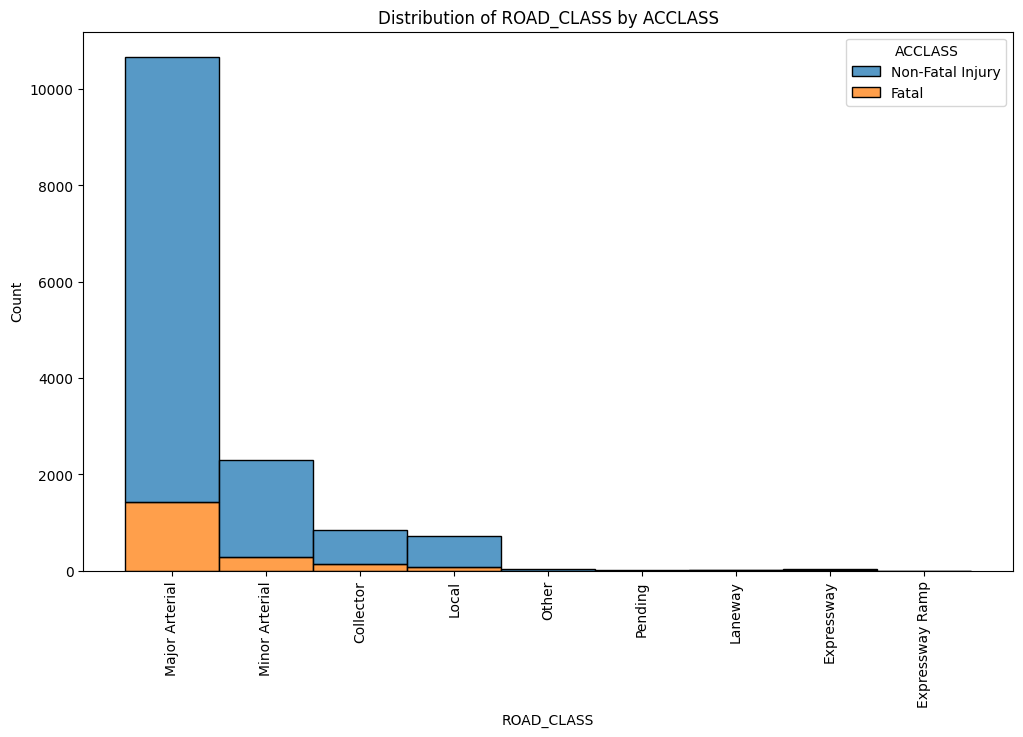

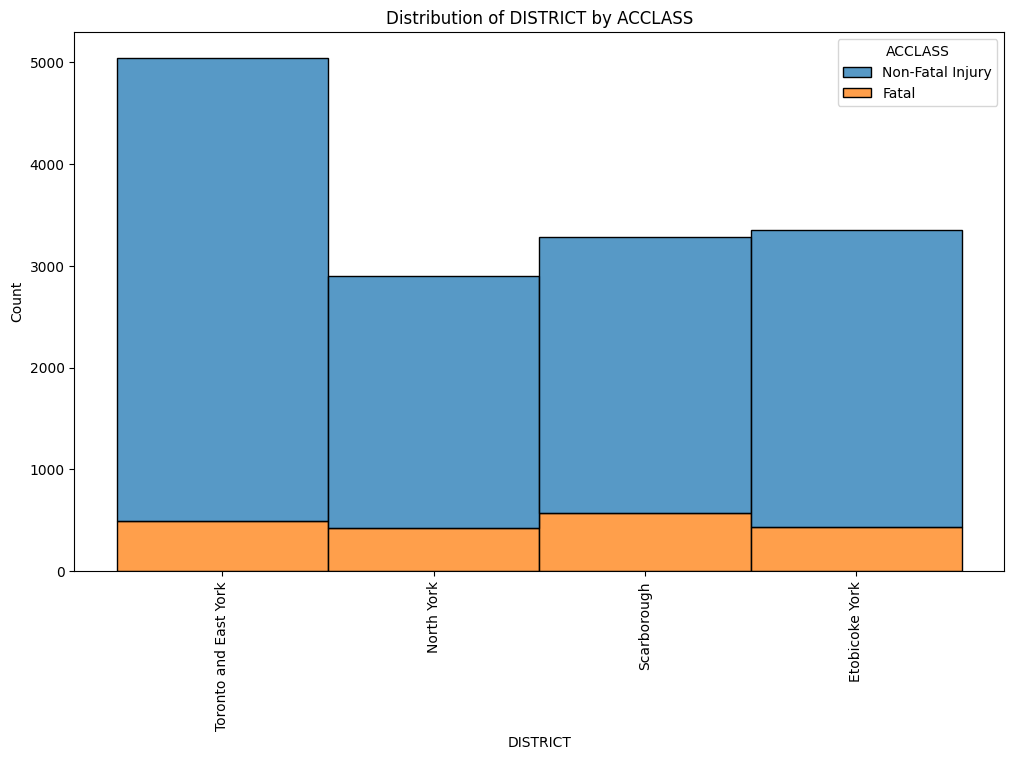

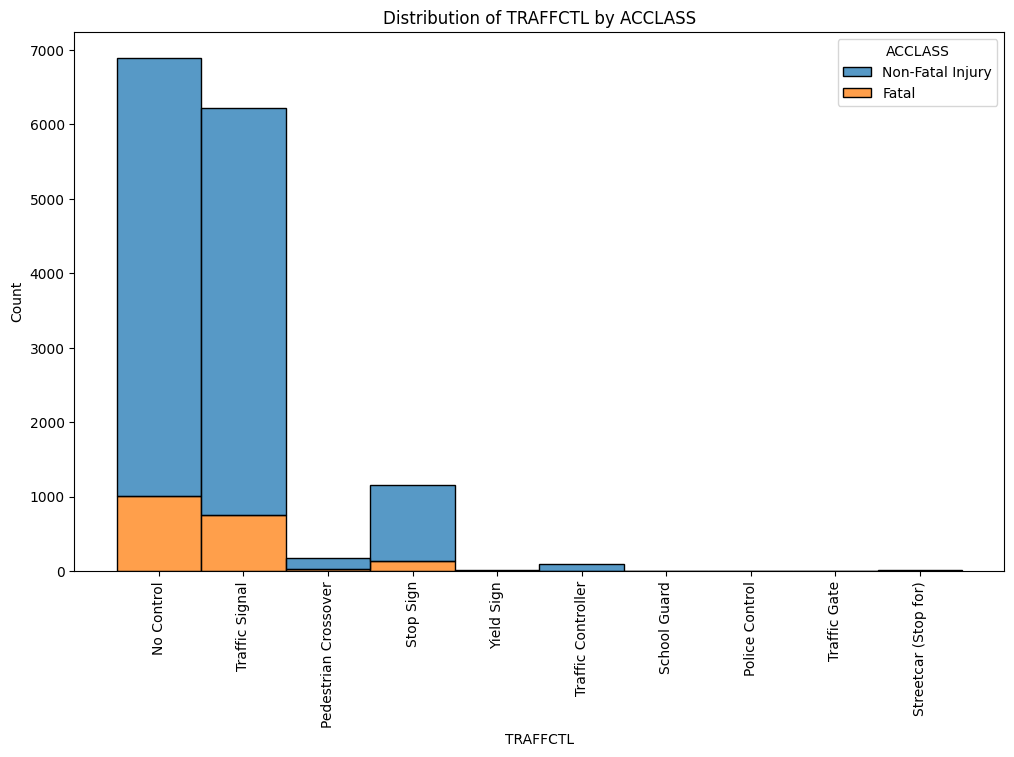

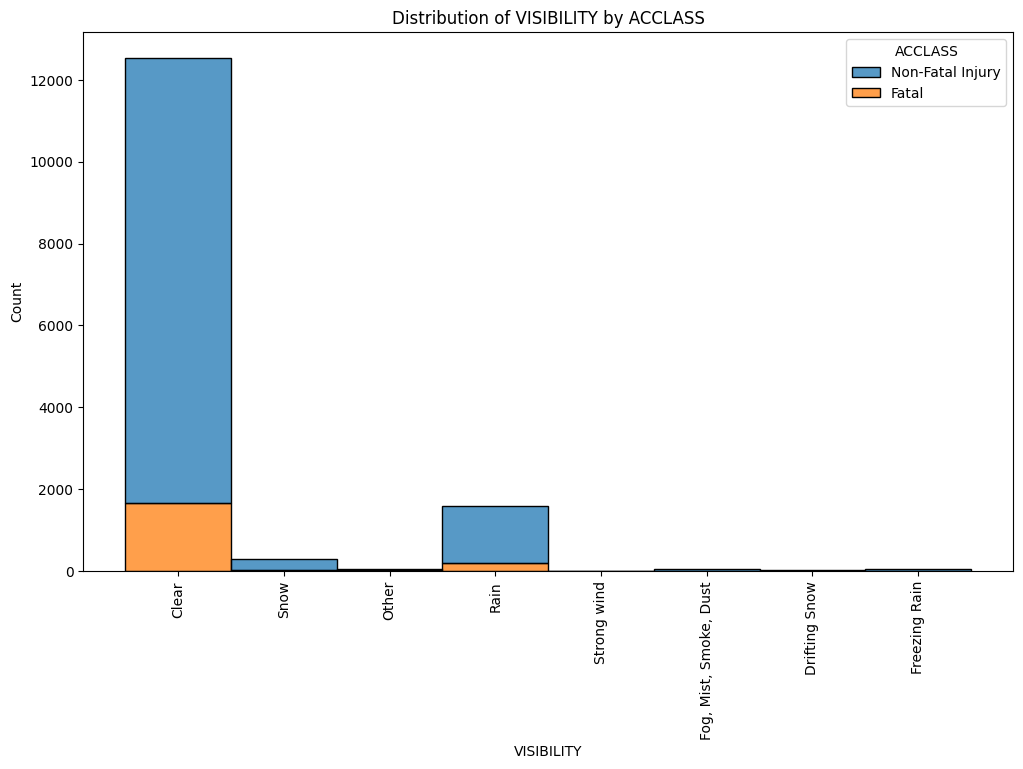

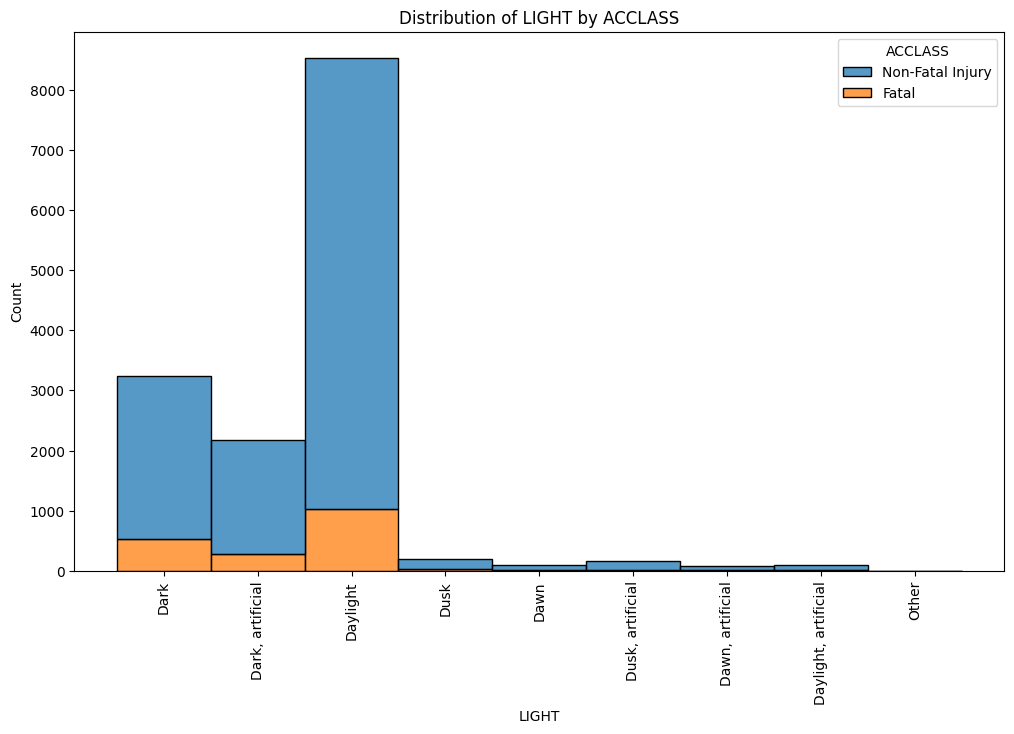

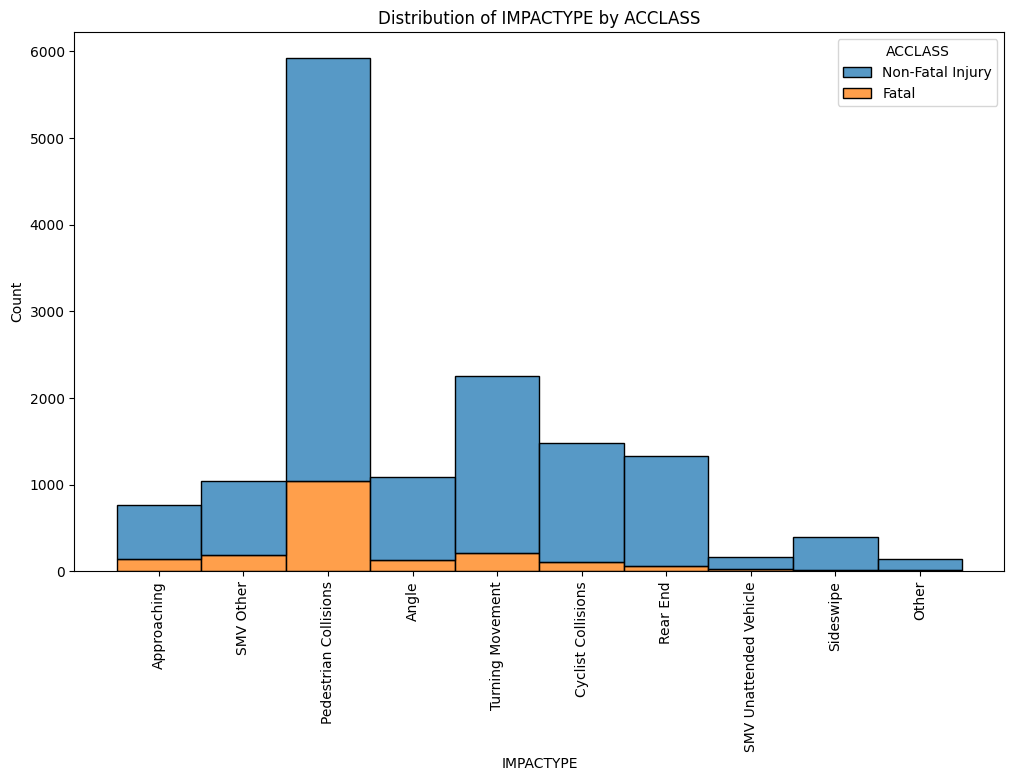

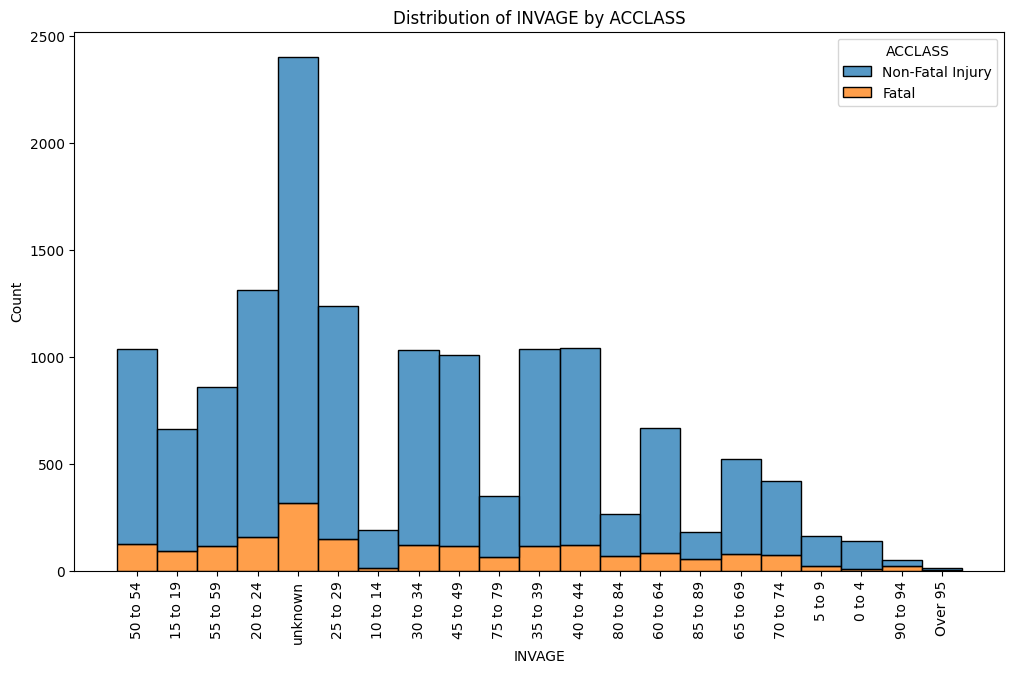

In [173]:
#showing the relationship between ACCLASS and ROAD_CLASS 
histplot_fun('ROAD_CLASS')

#showing the relationship between ACCLASS and DISTRICT 
histplot_fun('DISTRICT')

#showing the relationship between ACCLASS and TRAFFCTL 
histplot_fun('TRAFFCTL')

#showing the relationship between ACCLASS and VISIBILITY 
histplot_fun('VISIBILITY')

#showing the relationship between ACCLASS and LIGHT 
histplot_fun('LIGHT')

#showing the relationship between ACCLASS and IMPACTYPE 
histplot_fun('IMPACTYPE')

histplot_fun('INVAGE')

### Histogram explanation of ACCLASS AND ROAD_CLASS:
In this figure, we can observe that most of non fatal injuries occur in major Arterial area of road class that is 8000 followed by minorArterial,Collector and local(count is below 2000). In fatal Injuries all the values in these columns are are less than 2000 and in other remaining columns we can only seem some values (like very close to zero). We can observe the RIGHT skewness as well 

### Histogram Explanation of District And Acclass:
AS we observe that there are highest non fatal injuries are in Toronto north york region But other region values are also near 3000. While for fatal injuries the count is near 500.The distribution of data is Multimodal.

### Histogram explanation of Acclass and TRAFFCTL:
We can see that No control and traffic signal have highest number of Non Fatal injuries between range of 5000 to 6000. While there regions have values which are less than 1000. We can also observe the that data distribution is Skewed toward the right.

### Histogram Explanation of Acclass and Visibility:
In this, clear visibility have most Non fatal Fatal injuries among the other and Count of injuries in rain ans snow is less than 500 while other parameter values are very close to zero or zero.the data distribution in this is Bimodal.

### Histogram Explanation of Acclass and Light:
In this ,day light had largest non fatal injuries above 7000 followed by dark (near 3800) and Dark, artificial (near 2000).The fatal injury range of these are below 1000.While the other parameter values in range of (0-200).The data distribution in this Multimodal.

### Histogram Explanation of Acclass and ImpactType:
In this we can observe that pedestrian collision is most number of non fatal injuries but its value for fatal injury is near 1000.while other parameters values range for non fatal is between 500 to 2200, for fatal its between 0 to 300. The data distribution in this is also Bimodal.

### Histogram explanation of Acclass and Invage:
in This we can observe that ,Unknown ages have most number non fatal injuries among the other because other ages range for non fatal is between 0-1150.but fatal injuries are all less than 400.the data distribution in this is Multimodal

## Pre-processing pipeline

#### Group mapping

The first step in the pre-processing pipeline is to perform a group mapping. As each variable has its own categorical classes that need to be reduced in order to get the minimum amount of features once the hot encoding is performance, without sacrificing the accuracy of the classes in describing its nature, we map some classes that had more than 5 features into 5 or less features.

In [174]:
# Define mapping functions for each feature
def group_age(age):
    if age in ['0 to 4', '5 to 9', '10 to 14']:
        return 'Children'
    elif age in ['15 to 19', '20 to 24', '25 to 29', '30 to 34', '35 to 39',
                 '40 to 44', '45 to 49', '50 to 54', '55 to 59', '60 to 64']:
        return 'Adults'
    elif age in ['65 to 69', '70 to 74', '75 to 79', '80 to 84', '85 to 89',
                 '90 to 94', 'Over 95']:
        return 'Seniors'
    else:
        return 'Unknown'

def map_road_class(value):
    if value in ['Major Arterial', 'Minor Arterial']:
        return 'Arterials'
    elif value in ['Expressway', 'Expressway Ramp']:
        return 'Expressways'
    elif value in ['Collector', 'Local', 'Laneway']:
        return 'Local Roads'
    else:
        return 'Other'

def map_traffctl(value):
    if value == 'No Control':
        return 'No Control'
    elif value in ['Traffic Signal', 'Traffic Gate']:
        return 'Automated Control'
    elif value in ['Stop Sign', 'Yield Sign', 'Pedestrian Crossover']:
        return 'Signage'
    elif value in ['Traffic Controller', 'School Guard', 'Police Control']:
        return 'Human Control'
    else:
        return 'Other'

def map_visibility(value):
    if value == 'Clear':
        return 'Clear'
    elif value in ['Snow', 'Rain', 'Fog, Mist, Smoke, Dust', 'Drifting Snow', 'Freezing Rain']:
        return 'Obstructed'
    else:
        return 'Other'

def map_light(value):
    if value in ['Daylight', 'Dusk', 'Dawn']:
        return 'Natural Light'
    elif value in ['Dark, artificial', 'Dusk, artificial', 'Dawn, artificial', 'Daylight, artificial']:
        return 'Artificial Light'
    elif value == 'Dark':
        return 'Dark'
    else:
        return 'Other'

def map_rdsfcond(value):
    if value == 'Dry':
        return 'Clear'
    elif value in ['Wet', 'Slush', 'Loose Snow', 'Packed Snow', 'Spilled liquid', 'Loose Sand or Gravel']:
        return 'Wet'
    elif value == 'Ice':
        return 'Icy'
    else:
        return 'Other'

def map_impactype(value):
    if value in ['Approaching', 'Rear End', 'Sideswipe', 'Angle', 'Turning Movement']:
        return 'Vehicle Collisions'
    elif value in ['Pedestrian Collisions', 'Cyclist Collisions']:
        return 'Special Cases'
    elif value in ['SMV Other', 'SMV Unattended Vehicle']:
        return 'Static or Other Objects'
    else:
        return 'Other'

# Apply mapping functions
def apply_group_mapping(df):
    # Apply the mapping function to group
    df['INVAGE'] = df['INVAGE'].apply(group_age)
    df['ROAD_CLASS'] = df['ROAD_CLASS'].apply(map_road_class)
    df['TRAFFCTL'] = df['TRAFFCTL'].apply(map_traffctl)
    df['VISIBILITY'] = df['VISIBILITY'].apply(map_visibility)
    df['LIGHT'] = df['LIGHT'].apply(map_light)
    df['RDSFCOND'] = df['RDSFCOND'].apply(map_rdsfcond)
    df['IMPACTYPE'] = df['IMPACTYPE'].apply(map_impactype)
    return df

train_df = apply_group_mapping(train_df)
test_df = apply_group_mapping(test_df)

# Print the DataFrame to verify the grouping
print(train_df)


       OBJECTID ROAD_CLASS               DISTRICT           TRAFFCTL  \
0             1  Arterials  Toronto and East York         No Control   
1             2  Arterials  Toronto and East York         No Control   
2             3  Arterials  Toronto and East York         No Control   
3             4  Arterials  Toronto and East York         No Control   
4             5  Arterials  Toronto and East York         No Control   
...         ...        ...                    ...                ...   
14995     14996  Arterials            Scarborough  Automated Control   
14996     14997  Arterials  Toronto and East York         No Control   
14997     14998  Arterials  Toronto and East York         No Control   
14998     14999  Arterials            Scarborough  Automated Control   
14999     15000  Arterials            Scarborough  Automated Control   

      VISIBILITY          LIGHT RDSFCOND           ACCLASS  \
0          Clear           Dark      Wet  Non-Fatal Injury   
1          

We can see the new classes inside each feature:

In [175]:
count_func()

1. unique value number in OBJECTID : 14584 

1. unique value in OBJECTID: [    1     2     3 ... 14998 14999 15000] 

----------------------------------------------------------------------
2. unique value number in ROAD_CLASS : 4 

2. unique value in ROAD_CLASS: ['Arterials' 'Local Roads' 'Other' 'Expressways'] 

----------------------------------------------------------------------
3. unique value number in DISTRICT : 4 

3. unique value in DISTRICT: ['Toronto and East York' 'North York' 'Scarborough' 'Etobicoke York'] 

----------------------------------------------------------------------
4. unique value number in TRAFFCTL : 5 

4. unique value in TRAFFCTL: ['No Control' 'Automated Control' 'Signage' 'Human Control' 'Other'] 

----------------------------------------------------------------------
5. unique value number in VISIBILITY : 3 

5. unique value in VISIBILITY: ['Clear' 'Obstructed' 'Other'] 

----------------------------------------------------------------------
6. unique v

### Categorical to numerical mapping

Once the number of classes are reduced, we can start performing one-hot encoding for the nominal features and mapping to cero or one the binary categorical features. The other two features that will only be used to evaluate the model and not to train it, won't be transformed; this are OBJECT_ID' and 'ACCLASS' (target feature).

In [176]:
test_df.columns

Index(['OBJECTID', 'ROAD_CLASS', 'DISTRICT', 'TRAFFCTL', 'VISIBILITY', 'LIGHT',
       'RDSFCOND', 'IMPACTYPE', 'INVAGE', 'CYCLIST', 'AUTOMOBILE',
       'MOTORCYCLE', 'TRUCK', 'TRSN_CITY_VEH', 'EMERG_VEH', 'PASSENGER',
       'SPEEDING', 'REDLIGHT', 'ALCOHOL', 'DISABILITY'],
      dtype='object')

In [177]:
categorical_columns = ['ROAD_CLASS', 'DISTRICT', 'TRAFFCTL', 'VISIBILITY', 'LIGHT', 'RDSFCOND', 'IMPACTYPE']
boolean_columns = ['CYCLIST', 'AUTOMOBILE', 'MOTORCYCLE', 'TRUCK', 'TRSN_CITY_VEH', 'EMERG_VEH', 'PASSENGER',
       'SPEEDING', 'REDLIGHT', 'ALCOHOL', 'DISABILITY']
ordinal_columns = ['INVAGE', 'INJURY']

# Define the order for ordinal encoding
age_order = ['Unknown','Children', 'Adults', 'Seniors']


In [178]:
import pandas as pd
from sklearn.compose import ColumnTransformer
from sklearn.preprocessing import OrdinalEncoder, OneHotEncoder
from sklearn.pipeline import Pipeline
from sklearn.impute import SimpleImputer
from sklearn.preprocessing import FunctionTransformer
from sklearn.base import BaseEstimator, TransformerMixin

class YesNoToBinary(BaseEstimator, TransformerMixin):
    def fit(self, X, y=None):
        return self

    def transform(self, X):
        # Convert 'Yes' to 1 and 'No' to 0
        return np.where(X == 'Yes', 1, 0)
    
# Define the order for ordinal encoding
age_order = ['Unknown', 'Children', 'Adults', 'Seniors']


def cat_to_num(df, train):
    # define if the input df is the training or test to include the "ACCLASS" feature
    static_labels = []
    
    if train == True:
        static_labels = ['OBJECT_ID','ACCLASS']
    else:
        static_labels = ['OBJECT_ID']
    
    # Define the transformers
    preprocessor = ColumnTransformer(
        transformers=[
            ('categorical', Pipeline(steps=[
                ('imputer', SimpleImputer(strategy='most_frequent')),  # Impute missing values with the most frequent value
                ('onehot', OneHotEncoder(handle_unknown='ignore'))  # One-hot encode categorical variables
            ]), ['ROAD_CLASS', 'DISTRICT', 'TRAFFCTL', 'VISIBILITY', 'LIGHT', 'RDSFCOND', 'IMPACTYPE']),
            
            ('boolean', Pipeline(steps=[
                ('imputer', SimpleImputer(strategy='constant', fill_value='No')),  # Replace missing values with 'No'
                ('binary', YesNoToBinary())  # Convert 'Yes'/'No' to 1/0
            ]), ['CYCLIST', 'AUTOMOBILE', 'MOTORCYCLE', 'TRUCK', 'TRSN_CITY_VEH', 'EMERG_VEH', 'PASSENGER',
                'SPEEDING', 'REDLIGHT', 'ALCOHOL', 'DISABILITY']),
            
            ('ordinal', Pipeline(steps=[
                ('imputer', SimpleImputer(strategy='most_frequent')),  # Impute missing values with the most frequent value
                ('ordinal', OrdinalEncoder(categories=[age_order]))  # Ordinal encode age 
            ]), ['INVAGE'])
        ],
    remainder='passthrough'  # This ensures that columns not specified in transformers will be included unchanged
    )

    # Fit and transform the data
    transformed_df = preprocessor.fit_transform(df)

    # Convert the result back to DataFrame if needed
    # Get feature names from OneHotEncoder
    onehot_feature_names = preprocessor.named_transformers_['categorical'].named_steps['onehot'].get_feature_names_out(['ROAD_CLASS', 'DISTRICT', 'TRAFFCTL', 'VISIBILITY', 'LIGHT', 'RDSFCOND', 'IMPACTYPE'])

    # Combine feature names
    feature_names = (list(onehot_feature_names) +
                    ['CYCLIST', 'AUTOMOBILE', 'MOTORCYCLE', 'TRUCK', 'TRSN_CITY_VEH', 'EMERG_VEH', 'PASSENGER',
                    'SPEEDING', 'REDLIGHT', 'ALCOHOL', 'DISABILITY'] +
                    ['INVAGE'] +
                     static_labels)

    # Create DataFrame with new feature names
    transformed_df = pd.DataFrame(transformed_df, columns=feature_names)

    # Print the transformed DataFrame
    print(transformed_df)
    
    return transformed_df
    
new_train_df = train_df.copy()
new_test_df = test_df.copy()

new_train_df = new_train_df.reindex(train_df.index)
new_test_df = new_test_df.reindex(test_df.index)

new_test_df = cat_to_num(new_test_df, train= False)
new_train_df = cat_to_num(new_train_df, train = True)

      ROAD_CLASS_Arterials  ROAD_CLASS_Expressways  ROAD_CLASS_Local Roads  \
0                      1.0                     0.0                     0.0   
1                      1.0                     0.0                     0.0   
2                      1.0                     0.0                     0.0   
3                      1.0                     0.0                     0.0   
4                      1.0                     0.0                     0.0   
...                    ...                     ...                     ...   
3951                   1.0                     0.0                     0.0   
3952                   1.0                     0.0                     0.0   
3953                   1.0                     0.0                     0.0   
3954                   0.0                     0.0                     1.0   
3955                   0.0                     0.0                     1.0   

      ROAD_CLASS_Other  DISTRICT_Etobicoke York  DISTRICT_North

In [179]:
new_test_df.shape

(3956, 40)

In [180]:
new_train_df.shape

(14584, 42)

Because there were no values for TRAFFCTL_Other in the validation dataframe, this feature was not created. Because of that, we will create the column and fill it with zeros to match the shape of the train data that will determine the input shape for the neural network model

In [181]:
# Get the columns in df1 but not in df2
columns_only_in_df1 = set(new_train_df.columns) - set(new_test_df.columns)

print("Columns only in df1:", columns_only_in_df1)


Columns only in df1: {'TRAFFCTL_Other', 'ACCLASS'}


We added it in the same location that the train dataset so both have same index in the columns

In [182]:
# Find the position of column 'TRAFFCTL_Other'
position = new_train_df.columns.get_loc('TRAFFCTL_Other')
print(f"Position of column 'TRAFFCTL_Other': {position}")

Position of column 'TRAFFCTL_Other': 11


In [183]:
# Insert the new column at the same position as column 'TRAFFCTL_Other' in df
new_column = [0] * len(new_test_df)  # Create a list of zeros with that length
new_test_df.insert(position, 'TRAFFCTL_Other', new_column)

new_test_df['TRAFFCTL_Other']

0       0
1       0
2       0
3       0
4       0
       ..
3951    0
3952    0
3953    0
3954    0
3955    0
Name: TRAFFCTL_Other, Length: 3956, dtype: int64

In [184]:
# Compare columns order between new_train_df and new_test_df
columns_match_1 = new_train_df.drop(columns=['ACCLASS']).columns.equals(new_test_df.columns)
print(f"Columns order match between df1 and df2: {columns_match_1}")

Columns order match between df1 and df2: True


Now we only have one column different that is the labels, that are not available for the validation test.

In [185]:
print(new_train_df.shape)

(14584, 42)


In [186]:
new_test_df.shape

(3956, 41)

## Mapping

In this we made a function that maps the INVAGE column (age) to numerical indices so that we can use it in the predictions. We are using the map function for mapping it.

Making manual mapping in target feature so that we can use it in prediction (encoding) 

In [187]:
new_train_df['ACCLASS'].unique()

array(['Non-Fatal Injury', 'Fatal'], dtype=object)

In [188]:
train_df['ACCLASS'].isnull().sum()

0

In [189]:
# Mapping the target feature
new_train_df['ACCLASS'] = new_train_df['ACCLASS'].map({'Non-Fatal Injury': 0, 'Fatal': 1})

In [190]:
new_train_df['ACCLASS'].unique()

array([0, 1], dtype=int64)

In [191]:
new_train_df['ACCLASS'].isnull().sum()

0

In [192]:
train_df['ACCLASS'].shape

(14584,)

In [193]:
new_train_df['ACCLASS'].shape

(14584,)

## Train_test split

First we drop the OBJECT_ID' and 'ACCLASS' features to get only the features which will be used for the model to be train and save it in the X variable, and only save the target feature (labels) in the Y variable

In [194]:
X = new_train_df.drop(columns=['ACCLASS', 'OBJECT_ID'])
y = new_train_df['ACCLASS']

In [195]:
X.shape

(14584, 40)

As the validation set doesn't have the labels, we only drop the OBJECT_ID column

In [196]:
# same for val set
X_val = new_test_df.drop(columns=['OBJECT_ID'])

In [197]:
X_val.shape

(3956, 40)

In [198]:
X_train,X_test,y_train,y_test = train_test_split(X, y, test_size=0.2,random_state=42)

## Conversion to an acceptable format for TensorFlow

As Tensorflow doesn't accept pandas series as an input format for training the NNs, we transform the features into numpy arrays of type float32

In [199]:
# Convert to float32
X_train = np.array(X_train, dtype=np.float32)
y_train = np.array(y_train, dtype=np.float32)
X_test = np.array(X_test, dtype=np.float32)
y_test = np.array(y_test, dtype=np.float32)


In [200]:
X_val = np.array(X_val, dtype=np.float32)

In [201]:
print("X_train shape:", X_train.shape)
print("y_train shape:", y_train.shape)
print("X_test shape:", X_test.shape)
print("y_test shape:", y_test.shape)

X_train shape: (11667, 40)
y_train shape: (11667,)
X_test shape: (2917, 40)
y_test shape: (2917,)


In [202]:
print("X_val shape:", X_val.shape)

X_val shape: (3956, 40)


## Feature importance

Before training the model we can determine the feature importance to finally choose the most important feature and reduce even more the dataset

In [203]:
# Train a Random Forest model
model = RandomForestClassifier(n_estimators=100, random_state=42)
model.fit(X_train, y_train)

# Get feature importances
feature_importances = model.feature_importances_

# Create a DataFrame for better visualization
importance_df = pd.DataFrame({
    'Feature': X.columns,
    'Importance': feature_importances
}).sort_values(by='Importance', ascending=False)

print(importance_df)

                              Feature  Importance
39                             INVAGE    0.098590
34                          PASSENGER    0.086484
35                           SPEEDING    0.052042
31                              TRUCK    0.039811
10                TRAFFCTL_No Control    0.038900
18                LIGHT_Natural Light    0.037465
37                            ALCOHOL    0.037018
17                         LIGHT_Dark    0.036379
8          TRAFFCTL_Automated Control    0.033269
6                DISTRICT_Scarborough    0.032624
36                           REDLIGHT    0.031509
16             LIGHT_Artificial Light    0.031027
4             DISTRICT_Etobicoke York    0.030019
5                 DISTRICT_North York    0.029972
32                      TRSN_CITY_VEH    0.029110
7      DISTRICT_Toronto and East York    0.029068
29                         AUTOMOBILE    0.024600
30                         MOTORCYCLE    0.024542
28                            CYCLIST    0.024346


In [204]:
new_train_df.columns

Index(['ROAD_CLASS_Arterials', 'ROAD_CLASS_Expressways',
       'ROAD_CLASS_Local Roads', 'ROAD_CLASS_Other', 'DISTRICT_Etobicoke York',
       'DISTRICT_North York', 'DISTRICT_Scarborough',
       'DISTRICT_Toronto and East York', 'TRAFFCTL_Automated Control',
       'TRAFFCTL_Human Control', 'TRAFFCTL_No Control', 'TRAFFCTL_Other',
       'TRAFFCTL_Signage', 'VISIBILITY_Clear', 'VISIBILITY_Obstructed',
       'VISIBILITY_Other', 'LIGHT_Artificial Light', 'LIGHT_Dark',
       'LIGHT_Natural Light', 'LIGHT_Other', 'RDSFCOND_Clear', 'RDSFCOND_Icy',
       'RDSFCOND_Other', 'RDSFCOND_Wet', 'IMPACTYPE_Other',
       'IMPACTYPE_Special Cases', 'IMPACTYPE_Static or Other Objects',
       'IMPACTYPE_Vehicle Collisions', 'CYCLIST', 'AUTOMOBILE', 'MOTORCYCLE',
       'TRUCK', 'TRSN_CITY_VEH', 'EMERG_VEH', 'PASSENGER', 'SPEEDING',
       'REDLIGHT', 'ALCOHOL', 'DISABILITY', 'INVAGE', 'OBJECT_ID', 'ACCLASS'],
      dtype='object')

In [205]:
type(importance_df)

pandas.core.frame.DataFrame

We only choose the first 17 features as they are the ones with a feature importance greater than 2,5%

In [206]:
important_features = list(importance_df['Feature'][:16])
important_features

['INVAGE',
 'PASSENGER',
 'SPEEDING',
 'TRUCK',
 'TRAFFCTL_No Control',
 'LIGHT_Natural Light',
 'ALCOHOL',
 'LIGHT_Dark',
 'TRAFFCTL_Automated Control',
 'DISTRICT_Scarborough',
 'REDLIGHT',
 'LIGHT_Artificial Light',
 'DISTRICT_Etobicoke York',
 'DISTRICT_North York',
 'TRSN_CITY_VEH',
 'DISTRICT_Toronto and East York']

In [207]:
important_features_idx = list(importance_df[:16].index)

In [208]:
X_train2 = X_train[:,important_features_idx]
X_test2 = X_test[:,important_features_idx]

In [209]:
important_features_idx

[39, 34, 35, 31, 10, 18, 37, 17, 8, 6, 36, 16, 4, 5, 32, 7]

Now we can validate that the shape of the new X contains only 17 features

In [210]:
X_val2 = X_val[:,important_features_idx]

In [211]:
X_train2.shape[1:]

(16,)

In [212]:
X_train2.shape

(11667, 16)

In [213]:
X_val2.shape[1:]

(16,)

In [214]:
X_val2.shape

(3956, 16)

# Classification with various models

## Definition of the Class SupervisedModels

In this class we define the attributes of the SupervisedMLModels instance and the required methods to perform training of the sk.learn models and evaluation, visualization and prediction for all the models including the tensorflow model

In [215]:

class SupervisedMLModels:
    # defining function for preprocessing, hyperparameter tuning
    def __init__(self, new_train_df, tensorflow_model=None):
        self.new_train_df = new_train_df
        self.tensorflow_model = tensorflow_model  # Add this line to accept a TensorFlow model
        
        # making dictionary for models
        self.models = {
            'RandomForest': RandomForestClassifier(random_state=42),
            'GradientBoosting': GradientBoostingClassifier(random_state=42),
            'SVM': SVC(probability=True, random_state=42),
            'LogisticRegression': LogisticRegression(random_state=42)
        }
        
        # define parameters for all model
        self.param_grids = {
            'RandomForest': {
                'n_estimators': [100, 200, 300],
                'max_depth': [10, 20, 30, None],
                'min_samples_split': [2, 5, 10],
                'min_samples_leaf': [1, 2, 4]
            },
            'GradientBoosting': {
                'n_estimators': [100, 200, 300],
                'learning_rate': [0.01, 0.1, 0.2],
                'max_depth': [3, 4, 5]
            },
            'SVM': {
                'C': [0.1, 1, 10],
                'gamma': ['scale', 0.1, 1, 10],
                'kernel': ['rbf']
            },
            'LogisticRegression': {
                'C': [0.1, 1, 10],
                'solver': ['liblinear', 'saga']
            }
        }
        self.best_models = {}  # empty dictionary to store values of the best model
        
    # function to train and evaluate each model
    def train_and_evaluate(self):
        results = {}  # dictionary to store results of each model evaluations
        
        for name, model in self.models.items():
            print(f'training {name}....')
            grid_search = GridSearchCV(estimator=model, param_grid=self.param_grids[name], cv=3, n_jobs=-1, verbose=2)
            grid_search.fit(X_train2, y_train)
            best_model = grid_search.best_estimator_
            self.best_models[name] = best_model
            
            # doing model prediction 
            y_pred = best_model.predict(X_test2)
            accuracy = accuracy_score(y_test, y_pred)
            print(f'{name} Accuracy after tuning parameter is: {accuracy:.2f}')
            class_report = classification_report(y_test, y_pred, zero_division=0)
            print(f'{name} Classification Report for model is :\n{class_report}')
            conf_matrix = confusion_matrix(y_test, y_pred)
            print(f"confusion matrix for {name} is:\n{conf_matrix}")

            if name == 'GradientBoosting':
                y_prob = best_model.predict_proba(X_test2)[:, 1]
                fpr, tpr, _ = roc_curve(y_test, y_prob)
                auc_score = auc(fpr, tpr)
                print(f"Auc score {name} is :{auc_score:.2f}")
            
            results[name] = accuracy
        
        return results
    
    # defining a method for prediction using TensorFlow model
    def predict_with_tensorflow(self, X_test2, y_test):
        if self.tensorflow_model is not None:
            print("Predicting with TensorFlow model...")
            y_pred = (self.tensorflow_model.predict(X_test2) > 0.5).astype("int32")
            accuracy = accuracy_score(y_test, y_pred)
            print(f'TensorFlow Model Accuracy: {accuracy:.2f}')
            class_report = classification_report(y_test, y_pred, zero_division=0)
            print(f'TensorFlow Classification Report:\n{class_report}')
            conf_matrix = confusion_matrix(y_test, y_pred)
            print(f"Confusion Matrix for TensorFlow Model:\n{conf_matrix}")

            # Assuming a binary classification for ROC curve and AUC score
            if self.tensorflow_model.output_shape[-1] == 1:
                y_prob = self.tensorflow_model.predict(X_test2).ravel()
                fpr, tpr, _ = roc_curve(y_test, y_prob)
                auc_score = auc(fpr, tpr)
                print(f"TensorFlow AUC Score: {auc_score:.2f}")
        else:
            print("No TensorFlow model provided.")
    
    def predict_and_save(self, X_val2, object_id_col, output_file_prefix='submission'):
        predictions = {}
        
        for name, model in self.best_models.items():
            y_pred = model.predict(X_val2)
            predictions[name] = y_pred

            y_pred_final_df = pd.DataFrame({'OBJECTID': object_id_col, 'ACCLASS': y_pred})
            acclass_mapping_rev = {0: 'Non-Fatal Injury', 1: 'Fatal'}
            y_pred_final_df['ACCLASS'] = y_pred_final_df['ACCLASS'].map(acclass_mapping_rev)

            output_file = f'{output_file_prefix}_{name}.csv'
            y_pred_final_df.to_csv(output_file, index=False)
            print(f'Submission file for {name} is created successfully: {output_file}')

        # TensorFlow predictions
        if self.tensorflow_model is not None:
            y_pred = (self.tensorflow_model.predict(X_val2) > 0.5).astype("int32")
            y_pred_final_df = pd.DataFrame({'OBJECTID': object_id_col, 'ACCLASS': y_pred.flatten()})
            y_pred_final_df['ACCLASS'] = y_pred_final_df['ACCLASS'].map(acclass_mapping_rev)

            output_file = f'{output_file_prefix}_TensorFlow.csv'
            y_pred_final_df.to_csv(output_file, index=False)
            print(f'Submission file for TensorFlow model is created successfully: {output_file}')
    
    def plot_roc_curve(self):
        plt.figure(figsize=(12, 8))
        
        for name, model in self.best_models.items():
            if hasattr(model, 'predict_proba'):
                y_prob = model.predict_proba(X_test2)[:, 1]
            else:
                y_prob = model.decision_function(X_test2)
                
            fpr, tpr, _ = roc_curve(y_test, y_prob)
            auc_score = auc(fpr, tpr)
            plt.plot(fpr, tpr, label=f'{name} (AUC={auc_score:.2f})')
        
        # TensorFlow model ROC curve
        if self.tensorflow_model is not None:
            y_prob = self.tensorflow_model.predict(X_test2).ravel()
            fpr, tpr, _ = roc_curve(y_test, y_prob)
            auc_score = auc(fpr, tpr)
            plt.plot(fpr, tpr, label=f'TensorFlow (AUC={auc_score:.2f})')
        
        plt.plot([0, 1], [0, 1], "k--")
        plt.xlim([0.0, 1.0])
        plt.ylim([0.0, 1.05])
        plt.xlabel("False Positive Rate")
        plt.ylabel("True Positive Rate")
        plt.title("Receiver Operating Characteristic (ROC) Curve")
        plt.legend(loc="lower right")
        plt.show()

    def plot_training_validation_curve(self, model_name):
        model = self.best_models[model_name]
        
        train_sizes, train_scores, validation_scores = learning_curve(
            model, X_train2, y_train, cv=3, n_jobs=-1, train_sizes=np.linspace(0.1, 1.0, 10))
        
        plt.figure(figsize=(12, 6))
        plt.plot(train_sizes, np.mean(train_scores, axis=1), 'o-', color='r', label='Training Score')
        plt.plot(train_sizes, np.mean(validation_scores, axis=1), 'o-', color='g', label='Validation Score')
        
        plt.xlabel("Training Size")
        plt.ylabel("Score")
        plt.title(f"Training and Validation Curves for {model_name}")
        plt.legend(loc='best')
        plt.show()
    


    def plot_tf_training_validation_curve(self, history):
        """ Plot training and validation curves for the TensorFlow model.
        """
        # Extract data from history
        acc = history.history['accuracy']
        val_acc = history.history['val_accuracy']
        loss = history.history['loss']
        val_loss = history.history['val_loss']
        
        # Get number of epochs
        epochs = range(1, len(acc) + 1)
        
        # Plot training and validation accuracy
        plt.figure(figsize=(14, 5))
        plt.subplot(1, 2, 1)
        plt.plot(epochs, acc, 'bo-', label='Training accuracy')
        plt.plot(epochs, val_acc, 'r-', label='Validation accuracy')
        plt.title('Training and Validation Accuracy')
        plt.xlabel('Epochs')
        plt.ylabel('Accuracy')
        plt.legend()
        
        # Plot training and validation loss
        plt.subplot(1, 2, 2)
        plt.plot(epochs, loss, 'bo-', label='Training loss')
        plt.plot(epochs, val_loss, 'r-', label='Validation loss')
        plt.title('Training and Validation Loss')
        plt.xlabel('Epochs')
        plt.ylabel('Loss')
        plt.legend()
        
        plt.tight_layout()
        plt.show()
        
        

    def plot_feature_importance(self, feature_names):
        """
        Plot feature importance for each model in the class.
        """
        # Loop through each model and compute feature importances
        for name, model in self.best_models.items():
            if hasattr(model, 'feature_importances_'):  # Tree-based models
                importances = model.feature_importances_
            elif hasattr(model, 'coef_'):  # Linear models
                importances = np.abs(model.coef_).ravel()
            else:
                print(f"Feature importance is not available for {name}")
                continue
            
            # Sort feature importances in descending order
            indices = np.argsort(importances)[::-1]

            # Plot the feature importances
            plt.figure(figsize=(12, 6))
            plt.title(f"Feature Importances for {name}")
            plt.bar(range(len(importances)), importances[indices], align="center")
            plt.xticks(range(len(importances)), [feature_names[i] for i in indices], rotation=90)
            plt.xlim([-1, len(importances)])
            plt.xlabel('Feature')
            plt.ylabel('Importance')
            plt.tight_layout()
            plt.show()



## Creation of the Neural Networks model

In this case we use Neural networks to make the classification. For this, we use a simple model of dense layers with relu activation functions with some dropout layers to reduce the overfitting and improve model's performance. 

The dense layers start with 1200 neurons in the first layer and start descending by half of the neurons in each of the subsequent layers.

The last one has a sigmoid activation function as we are working with a binary classification problem.

In [216]:
print("TensorFlow version:", tf.__version__)

def get_model():
    model = Sequential([
        keras.layers.Input(shape=X_train2.shape[1:]),
        keras.layers.Dense(1200, activation='relu',),
        keras.layers.Dropout(0.2),
        keras.layers.Dense(600, activation='relu'),
        keras.layers.Dense(300, activation='relu'),
        keras.layers.Dropout(0.2),
        keras.layers.Dense(1, activation='sigmoid')
    ])
    
    return model

TensorFlow version: 2.17.0


We initialize the model and compile it while defining the optimizer, the loss function and the evaluation metrics.

We will be using *ADAMAX* as it is an improved version of the ADAM optimizer. Overall, while ADAM is generally more popular and widely used, ADAMAX can be a beneficial alternative in scenarios where gradient stability and sparse data handling are critical factors.

Also, there might be situations where, empirically, ADAMAX performs better than ADAM on specific datasets or tasks. It's always a good idea to experiment with both optimizers and see which one works better for that particular use case.

In our case, we observed better performance using ADAMAX, so decided to keep it.

As for the loss functions, the best alternative for a binary classification problem is using Binary Cross Entropy.

And the accuracy will be our metric as it is the same metric that we are being evaluated in the Kaggle competition



In [217]:
'''best performance: tf_model.compile(optimizer='adamax', 
              loss=keras.losses.BinaryCrossentropy(),
             metrics=['accuracy'])
             17 features
             current architecture
             30 epochs
             default learning rate
             '''
             
tf_model = get_model()

# Compile the model
tf_model.compile(optimizer='adamax', 
              loss=keras.losses.BinaryCrossentropy(),
             metrics=['accuracy'])

In [218]:
tf_model.summary()

Model: "sequential_1"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ dense_4 (Dense)                 │ (None, 1200)           │        20,400 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_2 (Dropout)             │ (None, 1200)           │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_5 (Dense)                 │ (None, 600)            │       720,600 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_6 (Dense)                 │ (None, 300)            │       180,300 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_3 (Dropout)             │ (None, 300)            │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_7 (Dense)                 │ (None, 1)              │           301 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 921,601 (3.52 MB)

 Trainable params: 921,601 (3.52 MB)

 Non-trainable params: 0 (0.00 B)

We save the history of the model to make further plot analysis of the accuracy and loss for both training and test sets

In [219]:
history = tf_model.fit(X_train2, y_train, epochs=30, validation_data=(X_test2, y_test), verbose=1)

Epoch 1/30
365/365 ━━━━━━━━━━━━━━━━━━━━ 4s 7ms/step - accuracy: 0.8653 - loss: 0.3954 - val_accuracy: 0.8711 - val_loss: 0.3659
Epoch 2/30
365/365 ━━━━━━━━━━━━━━━━━━━━ 2s 6ms/step - accuracy: 0.8672 - loss: 0.3722 - val_accuracy: 0.8732 - val_loss: 0.3708
Epoch 3/30
365/365 ━━━━━━━━━━━━━━━━━━━━ 2s 7ms/step - accuracy: 0.8693 - loss: 0.3677 - val_accuracy: 0.8738 - val_loss: 0.3579
Epoch 4/30
365/365 ━━━━━━━━━━━━━━━━━━━━ 2s 7ms/step - accuracy: 0.8679 - loss: 0.3595 - val_accuracy: 0.8738 - val_loss: 0.3575
Epoch 5/30
365/365 ━━━━━━━━━━━━━━━━━━━━ 2s 6ms/step - accuracy: 0.8714 - loss: 0.3569 - val_accuracy: 0.8690 - val_loss: 0.3589
Epoch 6/30
365/365 ━━━━━━━━━━━━━━━━━━━━ 2s 6ms/step - accuracy: 0.8752 - loss: 0.3507 - val_accuracy: 0.8756 - val_loss: 0.3547
Epoch 7/30
365/365 ━━━━━━━━━━━━━━━━━━━━ 3s 9ms/step - accuracy: 0.8731 - loss: 0.3539 - val_accuracy: 0.8738 - val_loss: 0.3546
Epoch 8/30
365/365 ━━━━━━━━━━━━━━━━━━━━ 3s 7ms/step - accuracy: 0.8774 - loss: 0.3430 - val_accuracy: 0.

We can also perform and individual evaluation of the trained model only with our test set

In [220]:
tf_model.evaluate(X_test2, y_test)

92/92 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - accuracy: 0.8720 - loss: 0.3447


[0.33735784888267517, 0.8769283294677734]

## Classification for all the models

In [221]:
# Initialize the class with your data and TensorFlow model
ml_models = SupervisedMLModels(new_train_df=X_train2, tensorflow_model=tf_model)

# Results of all model

Display the accuracy, classification report and confusion matrix for all the models

In [222]:
# Train and evaluate the scikit-learn models
results = ml_models.train_and_evaluate()
print("Training and evaluation results:", results)

training RandomForest....
Fitting 3 folds for each of 108 candidates, totalling 324 fits
RandomForest Accuracy after tuning parameter is: 0.88
RandomForest Classification Report for model is :
              precision    recall  f1-score   support

         0.0       0.88      0.99      0.93      2541
         1.0       0.73      0.10      0.17       376

    accuracy                           0.88      2917
   macro avg       0.81      0.55      0.55      2917
weighted avg       0.86      0.88      0.84      2917

confusion matrix for RandomForest is:
[[2528   13]
 [ 340   36]]
training GradientBoosting....
Fitting 3 folds for each of 27 candidates, totalling 81 fits
GradientBoosting Accuracy after tuning parameter is: 0.87
GradientBoosting Classification Report for model is :
              precision    recall  f1-score   support

         0.0       0.88      0.99      0.93      2541
         1.0       0.59      0.08      0.14       376

    accuracy                           0.87     

In [223]:
# Make predictions using the TensorFlow model
ml_models.predict_with_tensorflow(X_test2, y_test)

Predicting with TensorFlow model...
92/92 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step
TensorFlow Model Accuracy: 0.88
TensorFlow Classification Report:
              precision    recall  f1-score   support

         0.0       0.88      0.99      0.93      2541
         1.0       0.61      0.12      0.21       376

    accuracy                           0.88      2917
   macro avg       0.75      0.56      0.57      2917
weighted avg       0.85      0.88      0.84      2917

Confusion Matrix for TensorFlow Model:
[[2511   30]
 [ 329   47]]
92/92 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step
TensorFlow AUC Score: 0.74


#  Saving predictions in csv file

We save the labels in a variable to add it to validate the predictions

In [224]:
# tranfering value of object id to a variable
object_id_col = object_id_col['OBJECTID'] 

Then make predictions and save the file for the best-performing model

In [225]:
# Save predictions for validation set
ml_models.predict_and_save(X_val2=X_val2, object_id_col=object_id_col)

Submission file for RandomForest is created successfully: submission_RandomForest.csv
Submission file for GradientBoosting is created successfully: submission_GradientBoosting.csv
Submission file for SVM is created successfully: submission_SVM.csv
Submission file for LogisticRegression is created successfully: submission_LogisticRegression.csv
124/124 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step
Submission file for TensorFlow model is created successfully: submission_TensorFlow.csv


# Feature importance for all models

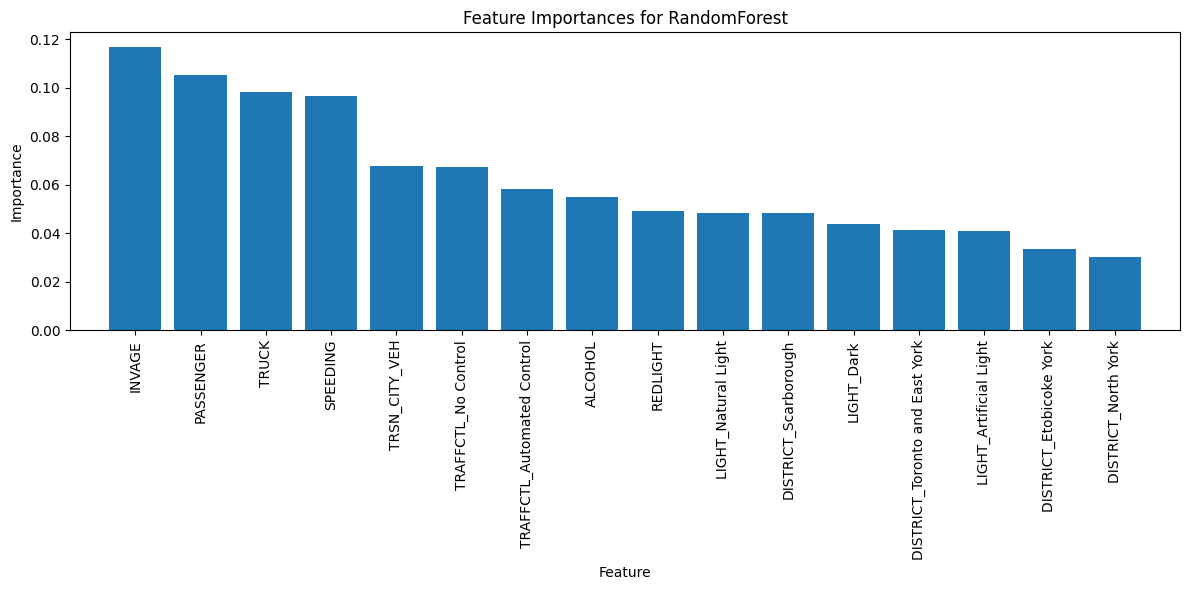

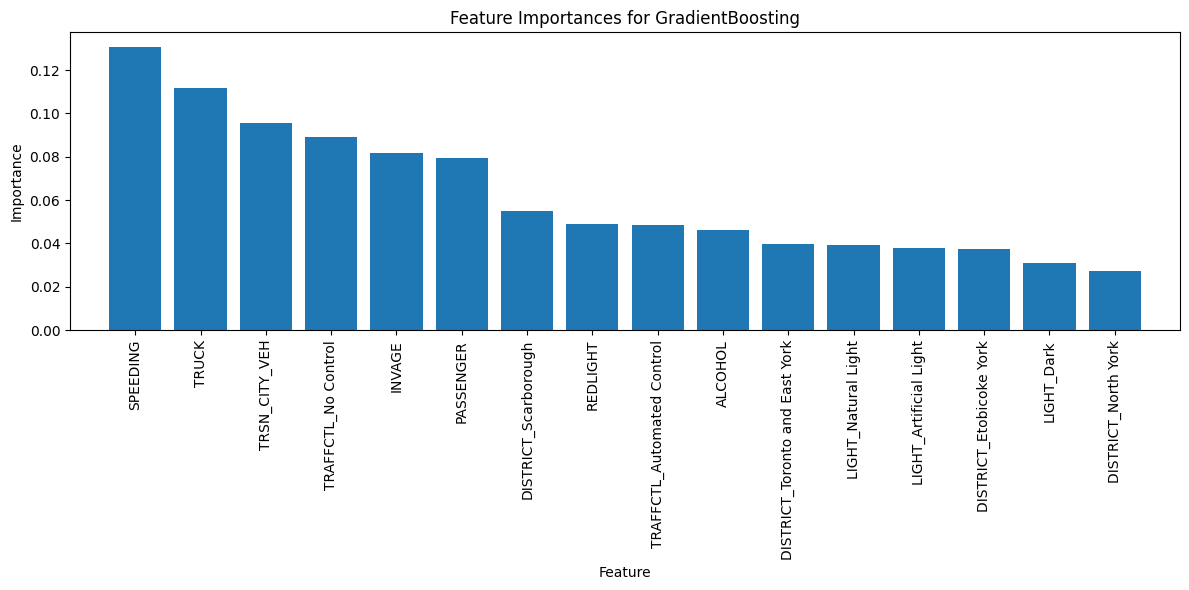

Feature importance is not available for SVM


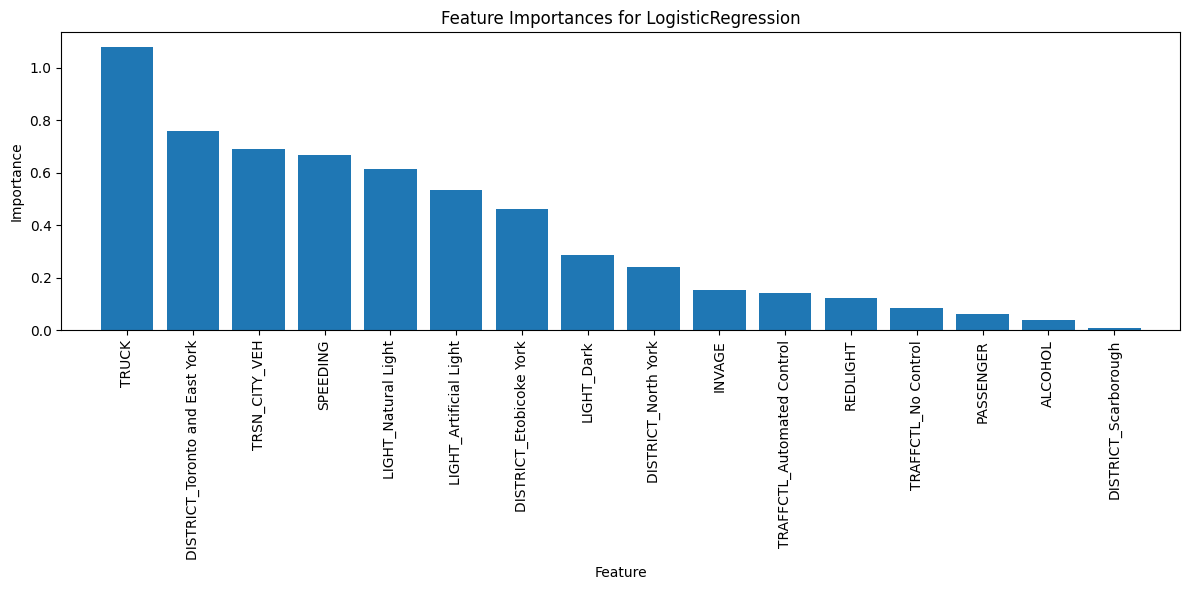

In [226]:
# Plot feature importances
ml_models.plot_feature_importance(important_features)

Feature importance is not built into neural networks (because of the complex, often non-linear interactions between features in neural networks) neither in SVM model because of the nature of its algorithm. For this, we won't be showing feature importance for this two algorithms

# ROC curves for all model

92/92 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step


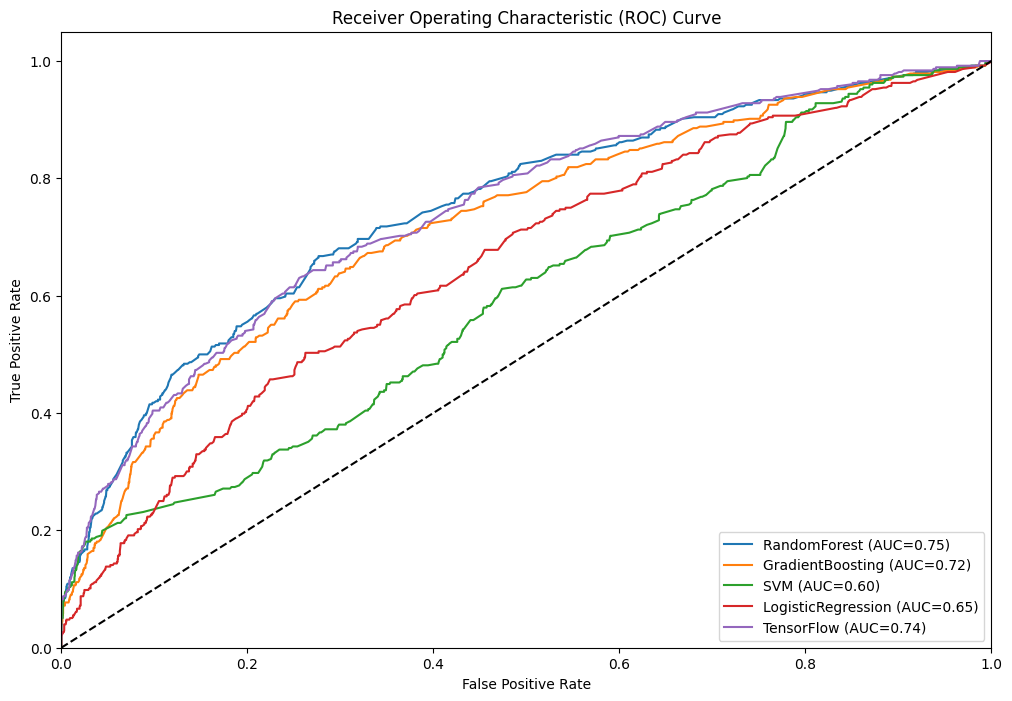

In [227]:
# Plot ROC curves for all models
ml_models.plot_roc_curve()

The AUC score represents the overall ability of the model to discriminate between classes.

### AUC Random forest:
This model is performing well as a score of 75% indicates that the model's ability to distinguish between the classes is good. It indicates that, on average, 75% of the time, the model gives a positive instance a higher ranking than to a negative instance. To check whether the this model is overfitting or not we will use the training and validation curve which we will explain in the following cells
### AUC Gradient boosting:
the model performance is almost similar to random forest as auc score is near 72 but to know about its overfitting we will take a look at its training and validation curves.
### AUC SVM:
this model is performance is not as goods as above two models as score is 60 its could be a good model to use but its less effective than other two models. Again to know its overfitting and underfitting we need the training and validation curves.
### AUC Logistic regression:
This model performance is very poor as score is 65 and could be simple model to know about the underlying patterns in dataset. This could underfit the model but we will check it using training and validation curves.
### AUC Tensor flow :
this model is performing well as score is almost the same of the Random forest (75). Overfitting will be checked using the curves.

# Training and validation curve

curve for random forest :


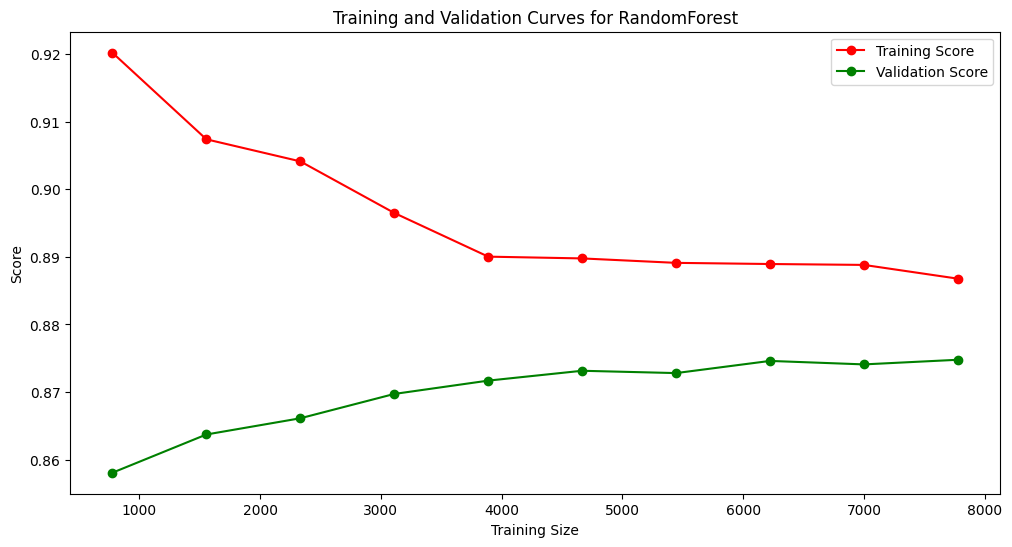

In [228]:
# calling training and validation curve method to plot the curve
print("curve for random forest :")
ml_models.plot_training_validation_curve('RandomForest')

As we can see that there is covergence between the curve and they become parllel after 4000 training size and an appropiate model from our analysis.The model had  caputered most of relevant information from dataset which was trained but not an complex enough to be an overfit model.

It also tells that hyper parameter tuning done by us is robust enough to make the balance between bias and variance.

curve for random GradientBoosting :


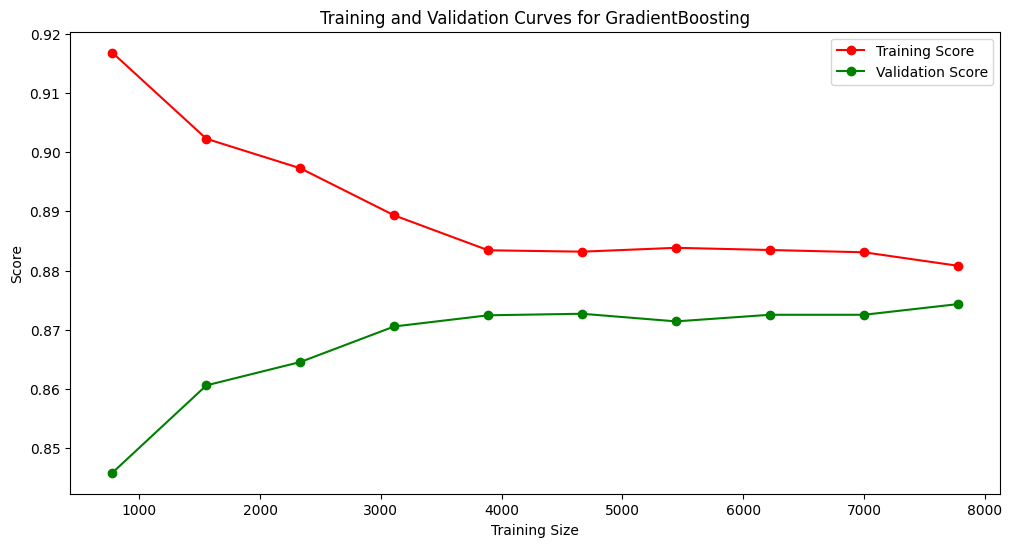

In [229]:
# calling training and validation curve method to plot the curve
print("curve for random GradientBoosting :")
ml_models.plot_training_validation_curve('GradientBoosting')

The Similar results can be seen from above graph which means this is good fit model not an overfit model for our analysis.

curve for random SVM :


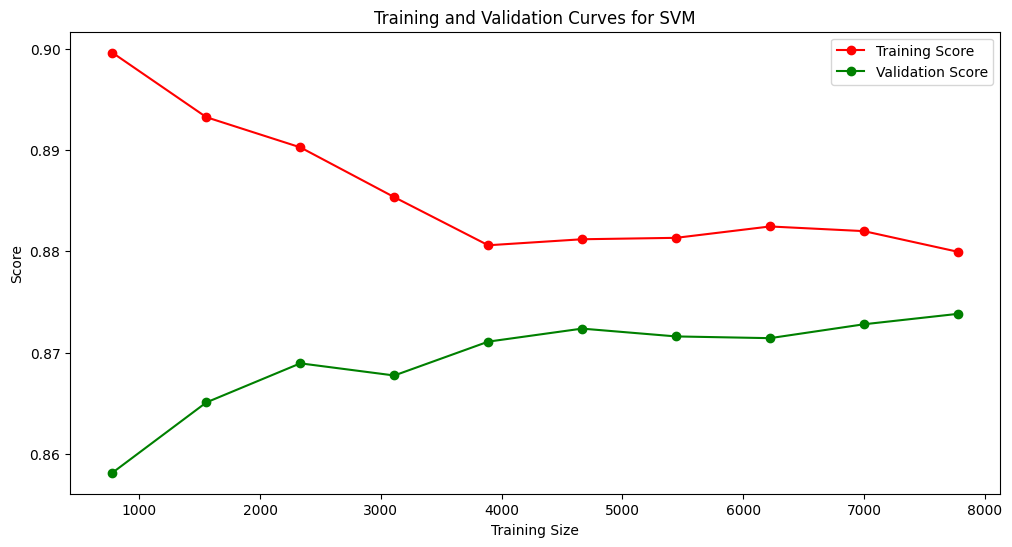

In [230]:
# calling training and validation curve method to plot the curve
print("curve for random SVM :")
ml_models.plot_training_validation_curve('SVM')

As we can see that there is significant decrease in values of training score and increase in validation score and both of curves come near at 0.88 but become parallel after that, so this model would also be good fit for our analysis.

curve for random LogisticRegression :


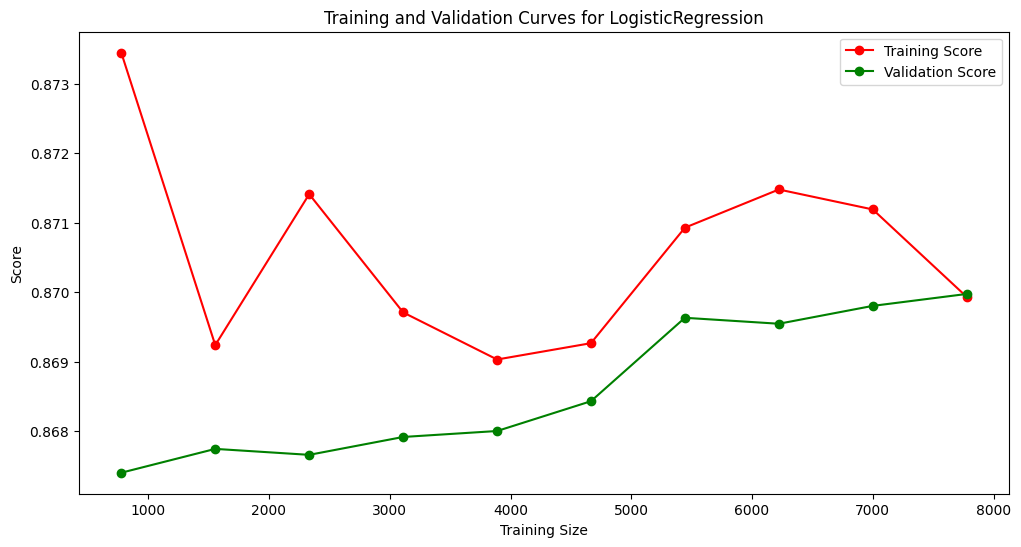

In [236]:
# calling training and validation curve method to plot the curve
print("curve for random LogisticRegression :")
ml_models.plot_training_validation_curve('LogisticRegression')

As we can see that the curves have some ups and down initially which shows that model struggle to stabilize learning path but after 4000 training size it get stabilize but 5000 there is increase in scores. After 7000 the training score starts to decrease and meet validation curve near 8000.This tell that there of need more hyper parameter tuning in order to achieve balance between the bias and variance in the dataset.

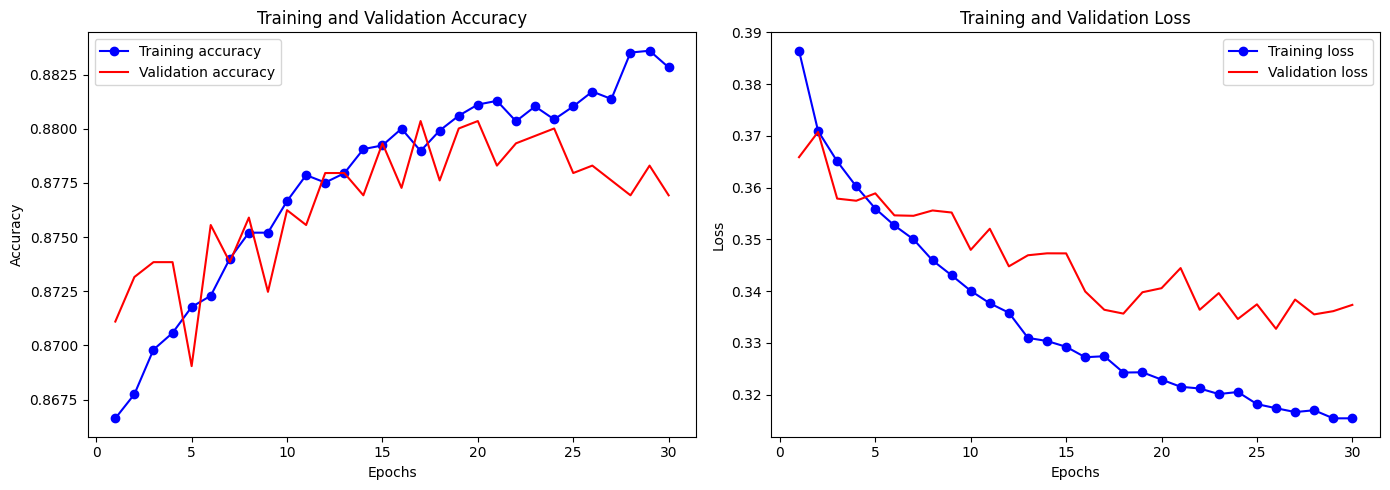

In [232]:
# Plot the training and validation curves for the TensorFlow model
ml_models.plot_tf_training_validation_curve(history)

From the above plot we can clearly see that after some time the training accuracy becomes higher than validation while the validation loss has become significant at 0.340 while training remain to decrease which means that after 25 epochs, the model will start to overfit.

# Generating the model file

We can save our model in a SavedModel format as it follows:

In [233]:
# Save the model as an .h5 (deprecated)
#tf_model.save('my_model.h5')

In [234]:
# Save the entire model as a `.keras` zip archive.
tf_model.save('my_model.keras')

And loaded it again to make new predictions without having to train the model again with the following function:

In [235]:
new_model = tf.keras.models.load_model('my_model.keras')

# Show the model architecture
new_model.summary()

Model: "sequential_1"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ dense_4 (Dense)                 │ (None, 1200)           │        20,400 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_2 (Dropout)             │ (None, 1200)           │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_5 (Dense)                 │ (None, 600)            │       720,600 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_6 (Dense)                 │ (None, 300)            │       180,300 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_3 (Dropout)             │ (None, 300)            │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_7 (Dense)                 │ (None, 1)              │           301 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 2,764,805 (10.55 MB)

 Trainable params: 921,601 (3.52 MB)

 Non-trainable params: 0 (0.00 B)

 Optimizer params: 1,843,204 (7.03 MB)